# DEEP EUTECTIC SOLVENTS. MELTING TEMPERATURE. ML ALGORITHMS 

## 1. Preparation

In [34]:
import pandas             as pd
import numpy              as np
import matplotlib.pyplot  as plt
import matplotlib.patches as mpatches
import seaborn            as sns
import itertools
import time
import shap


from sklearn.preprocessing   import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_squared_error
from math                    import sqrt
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics         import r2_score, mean_squared_error
from sklearn.model_selection import GroupKFold
from sklearn.linear_model    import LinearRegression
from sklearn.ensemble        import RandomForestRegressor
from xgboost                 import XGBRegressor
from catboost                import CatBoostRegressor
from sklearn.svm             import SVR
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.metrics         import mean_squared_error
from sklearn.linear_model    import Ridge
from sklearn.ensemble        import GradientBoostingRegressor
from sklearn.tree            import DecisionTreeRegressor
from sklearn.neural_network  import MLPRegressor
from matplotlib.colors       import ColorConverter
from prettytable             import PrettyTable


### 1.1. Working with the table
First you need to edit the table a little and see its main characteristics for further machine learning

In [35]:
df = pd.read_csv('Melt_temp_ML.csv')
df

Number of components Type of DES  \
0                        2           1   
1                        2           1   
2                        2           1   
3                        2           1   
4                        2           1   
...                    ...         ...   
2264                     2          IL   
2265                     2          IL   
2266                     2          IL   
2267                     2          IL   
2268                     2          IL   

                                    Component#1  \
0                               zinc;dichloride   
1                                   dichlorotin   
2                               zinc;dichloride   
3                                   dichlorotin   
4                               zinc;dichloride   
...                                         ...   
2264  2-hydroxyethyl(trimethyl)azanium;chloride   
2265  2-hydroxyethyl(trimethyl)azanium;chloride   
2266  2-hydroxyethyl(trimethyl)azanium;chloride   
2267  2-hydroxyethyl(trimethyl)azanium;chloride   
2268  2-hydroxyethyl(trimethyl)azanium;chloride   

                                           Component#2  X#1 (molar fraction)  \
0                           tetraethylazanium;chloride              0.666667   
1             2-chloroethyl(trimethyl)azanium;chloride              0.666667   
2             2-chloroethyl(trimethyl)azanium;chloride              0.666667   
3          2-acetyloxyethyl(trimethyl)azanium;chloride              0.666667   
4          2-acetyloxyethyl(trimethyl)azanium;chloride              0.666667   
...                                                ...                   ...   
2264  benzyl-(2-hydroxyethyl)-dimethylazanium;chloride              0.303000   
2265  benzyl-(2-hydroxyethyl)-dimethylazanium;chloride              0.222000   
2266  benzyl-(2-hydroxyethyl)-dimethylazanium;chloride              0.197000   
2267  benzyl-(2-hydroxyethyl)-dimethylazanium;chloride              0.114000   
2268  benzyl-(2-hydroxyethyl)-dimethylazanium;chloride              0.101000   

      X#2 (molar fraction)  Tmelt, K Phase diagram (Yes/No)  \
0                 0.333333    364.15                     No   
1                 0.333333    343.15                     No   
2                 0.333333    297.15                     No   
3                 0.333333    287.15                     No   
4                 0.333333    304.15                     No   
...                    ...       ...                    ...   
2264              0.697000    317.60                    Yes   
2265              0.778000    330.50                    Yes   
2266              0.803000    331.50                    Yes   
2267              0.886000    338.80                    Yes   
2268              0.899000    345.80                    Yes   

                  Reference (DOI)              Smiles#1  ... fr_Al_COO  \
0                10.1039/B106357J    [Cl-].[Cl-].[Zn+2]  ...       0.0   
1                10.1039/B106357J    [Cl-].[Sn+2].[Cl-]  ...       0.0   
2                10.1039/B106357J    [Cl-].[Cl-].[Zn+2]  ...       0.0   
3                10.1039/B106357J    [Cl-].[Sn+2].[Cl-]  ...       0.0   
4                10.1039/B106357J    [Cl-].[Cl-].[Zn+2]  ...       0.0   
...                           ...                   ...  ...       ...   
2264  10.1016/j.fluid.2017.03.015  C[N+](C)(C)CCO.[Cl-]  ...       0.0   
2265  10.1016/j.fluid.2017.03.015  C[N+](C)(C)CCO.[Cl-]  ...       0.0   
2266  10.1016/j.fluid.2017.03.015  C[N+](C)(C)CCO.[Cl-]  ...       0.0   
2267  10.1016/j.fluid.2017.03.015  C[N+](C)(C)CCO.[Cl-]  ...       0.0   
2268  10.1016/j.fluid.2017.03.015  C[N+](C)(C)CCO.[Cl-]  ...       0.0   

      fr_Ar_COO  fr_Ar_N  fr_Ar_OH    fr_NH0  fr_NH1  fr_amide   AROM  \
0           0.0      0.0       0.0  0.333333     0.0       0.0  0.000   
1           0.0      0.0       0.0  0.333333     0.0       0.0  0.000   
2           0.0      0.0       0.0  0.333333     0.0       0.0

In [36]:
df.columns

Index(['Number of components', 'Type of DES', 'Component#1', 'Component#2',
       'X#1 (molar fraction)', 'X#2 (molar fraction)', 'Tmelt, K',
       'Phase diagram (Yes/No)', 'Reference (DOI)', 'Smiles#1', 'Smiles#2',
       'Tmelt#1', 'Tmelt#2', 'MW', 'HBD_total', 'fr_Al_COO', 'fr_Ar_COO',
       'fr_Ar_N', 'fr_Ar_OH', 'fr_NH0', 'fr_NH1', 'fr_amide', 'AROM', 'ALERTS',
       'n_HM'],
      dtype='object')

In [37]:
# creating a DataFrame df_unique with a list of unique combinations from component columns
df_unique = df[['Component#1', 'Component#2']].drop_duplicates()
df_unique = df_unique.reset_index(drop=True)
df_unique = df_unique.reset_index()  # convert indexes to a column
df_unique['index_col'] = df_unique['index']  # create a new column and assign it the values of the column with indexes
# combine df2 and df_unique by Component#1 and Component#2 columns
merged = df.merge(df_unique, on=['Component#1', 'Component#2'])
# create the indexes column and fill it with values from the index column from df_unique
merged['indexes'] = merged['index']
# we remove the index column from merged, since we no longer need it
merged.drop('index', axis=1, inplace=True)
df = merged.drop(['Number of components', 'Component#1', 'Component#2', 'X#2 (molar fraction)',
                  'Phase diagram (Yes/No)', 'Reference (DOI)', 'Smiles#1', 'Smiles#2', 'index_col'], axis=1)
# moving the column 'Tmelt, K' to the first place
df = df[['Tmelt, K', 'X#1 (molar fraction)', 'Type of DES', 'Tmelt#1', 'Tmelt#2', 'MW', 'HBD_total', 'fr_Al_COO', 'fr_Ar_COO', 
         'fr_Ar_N', 'fr_Ar_OH', 'fr_NH0', 'fr_NH1', 'fr_amide', 'AROM', 'ALERTS', 'n_HM', 'indexes']]
# One-hot encoding
one_hot = pd.get_dummies(df['Type of DES'])
# Concatenate the one-hot encoded columns with the original dataframe
df = pd.concat([df, one_hot], axis=1)
# Drop the original 'Category' column
df = df.drop('Type of DES', axis=1)
# Columns to move
columns_to_move = ['1',	'2', '3', '4', '5', 'IL']
# The column after which you need to move the columns
target_column = 'X#1 (molar fraction)'
# Find the index of the target column
target_index = df.columns.get_loc(target_column)
# Moving columns
for col in reversed(columns_to_move):
    # Copy the column
    temp_col = df.pop(col)
    # Insert a column after the target column
    df.insert(target_index + 1, col, temp_col)
df = df.rename(columns={'indexes': 'ind_syst'})

In [38]:
df

Tmelt, K  X#1 (molar fraction)  1  2  3  4  5  IL  Tmelt#1  Tmelt#2  \
0       364.15              0.666667  1  0  0  0  0   0   563.15   633.15   
1       343.15              0.666667  1  0  0  0  0   0   519.15   498.15   
2       297.15              0.666667  1  0  0  0  0   0   563.15   498.15   
3       287.15              0.666667  1  0  0  0  0   0   519.15   423.65   
4       293.15              0.666700  1  0  0  0  0   0   519.15   423.65   
...        ...                   ... .. .. .. .. ..  ..      ...      ...   
2264    317.60              0.303000  0  0  0  0  0   1   578.15   351.42   
2265    330.50              0.222000  0  0  0  0  0   1   578.15   351.42   
2266    331.50              0.197000  0  0  0  0  0   1   578.15   351.42   
2267    338.80              0.114000  0  0  0  0  0   1   578.15   351.42   
2268    345.80              0.101000  0  0  0  0  0   1   578.15   351.42   

      ...  fr_Ar_COO  fr_Ar_N  fr_Ar_OH    fr_NH0  fr_NH1  fr_amide   AROM  \
0     ...        0.0      0.0       0.0  0.333333     0.0       0.0  0.000   
1     ...        0.0      0.0       0.0  0.333333     0.0       0.0  0.000   
2     ...        0.0      0.0       0.0  0.333333     0.0       0.0  0.000   
3     ...        0.0      0.0       0.0  0.333333     0.0       0.0  0.000   
4     ...        0.0      0.0       0.0  0.333300     0.0       0.0  0.000   
...   ...        ...      ...       ...       ...     ...       ...    ...   
2264  ...        0.0      0.0       0.0  1.000000     0.0       0.0  0.697   
2265  ...        0.0      0.0       0.0  1.000000     0.0       0.0  0.778   
2266  ...        0.0      0.0       0.0  1.000000     0.0       0.0  0.803   
2267  ...        0.0      0.0       0.0  1.000000     0.0       0.0  0.886   
2268  ...        0.0      0.0       0.0  1.000000     0.0       0.0  0.899   

        ALERTS      n_HM  ind_syst  
0     1.000000  0.666667         0  
1     1.333333  0.666667         1  
2     1.333333  0.666667         2  
3     1.333333  0.666667         3  
4     1.333300  0.666700         3  
...        ...       ...       ...  
2264  1.000000  0.000000       377  
2265  1.000000  0.000000       377  
2266  1.000000  0.000000       377  
2267  1.000000  0.000000       377  
2268  1.000000  0.000000       377  

[2269 rows x 23 columns]

### 1.2. Splitting data into test and train

In [39]:
# # Splitting the mixes-out data (divide the dataset by y_validate and X, divide X by 5 folds. 1 fold: x_train, y_train, x_test, y_test)
def mix_out(x,y,groups,n_splits,test_size):
    mix_out = []
    kfold = GroupShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)
    for train_idx, test_idx in kfold.split(x, y, groups):
        mix_out.append((train_idx, test_idx))
    return mix_out

valid_list = []
xy_list = []
valid_list_s = []
xy_list_s = []

# Splitting the selection
y = df.loc[:,'Tmelt, K']
x = df.loc[:,'X#1 (molar fraction)':]
mixture_out = mix_out(x, y, df['ind_syst'], 1, 0.2)
for train_idx, val_idx in mixture_out:
    valid_list.append((x.iloc[train_idx],
                       x.iloc[val_idx],
                       y.iloc[train_idx],
                       y.iloc[val_idx]))

mixture_out = mix_out(valid_list[0][0], valid_list[0][2], valid_list[0][0]['ind_syst'], 5, 0.2)
for train_idx, val_idx in mixture_out:
    # [[x_train, x_test, y_train, y_test], [], [], [], []]
    xy_list.append((valid_list[0][0].iloc[train_idx],
                    valid_list[0][0].iloc[val_idx],
                    valid_list[0][2].iloc[train_idx],
                    valid_list[0][2].iloc[val_idx]))

# Removing the 'ing_syst' column from datasets in the valid_list list
for i, (x_train, x_val, y_train, y_val) in enumerate(valid_list):
    valid_list[i] = (x_train.drop('ind_syst', axis=1),
                     x_val.drop('ind_syst', axis=1),
                     y_train,
                     y_val)

# Removing the 'ing_syst' column from datasets in the xy_list list
for i, (x_train, x_test, y_train, y_test) in enumerate(xy_list):
    xy_list[i] = (x_train.drop('ind_syst', axis=1),
                  x_test.drop('ind_syst', axis=1),
                  y_train,
                  y_test)

# Normalize the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Works better with a list
valid_list_s.append([scaler_x.fit_transform(valid_list[0][0]),
                scaler_x.transform(valid_list[0][1]),
                scaler_y.fit_transform(valid_list[0][2].values.reshape(-1, 1)),
                scaler_y.transform(valid_list[0][3].values.reshape(-1, 1))])
for fold in range(len(xy_list)):
    xy_list_s.append([scaler_x.fit_transform(xy_list[fold][0]),
                scaler_x.transform(xy_list[fold][1]),
                scaler_y.fit_transform(xy_list[fold][2].values.reshape(-1, 1)),
                scaler_y.transform(xy_list[fold][3].values.reshape(-1, 1))])

### 1.3. Functions for plotting and calculating metrics

In [40]:
def compute_type(xy_list, model, types=['1', '2', '3', '4', '5', 'IL']):
    results_dict = {}
    for type in types:
        type_list = []
        for X_train, X_test, y_train, y_test in xy_list:
            type_list.append((X_train[X_train[type]==1], X_test[X_test[type]==1], y_train.loc[X_train[X_train[type]==1].index], y_test.loc[X_test[X_test[type]==1].index]))

        r2_list = []
        rmse_list = []
        r2_train_list = []
        rmse_train_list = []

        for X_train, X_test, y_train, y_test in type_list:
            # Normalize the data
            if len(X_train) > 2 and len(X_test) > 2:
                scaler_x = MinMaxScaler()
                scaler_y = MinMaxScaler()
                X_train_scaled = scaler_x.fit_transform(X_train)
                X_test_scaled = scaler_x.transform(X_test)
                y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
                y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()

                # Train the model
                model.fit(X_train_scaled, y_train_scaled)

                # Predict
                y_pred = model.predict(X_test_scaled)
                y1_pred = model.predict(X_train_scaled)

                # Transform the predictions back to the original scale
                y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
                y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
                y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()

                # Calculate metrics
                r2 = r2_score(y_test, y_pred)
                rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                r2_train = r2_score(y_train, y1_pred)
                rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))

                r2_list.append(r2)
                rmse_list.append(rmse)
                r2_train_list.append(r2_train)
                rmse_train_list.append(rmse_train)
                
            if len(X_train) < 3:
                r2_list.append(np.nan)
                rmse_list.append(np.nan)
                r2_train_list.append(np.nan)
                rmse_train_list.append(np.nan)
                
            if len(X_train) > 2 and len(X_test) < 3:
                scaler_x = MinMaxScaler()
                scaler_y = MinMaxScaler()
                X_train_scaled = scaler_x.fit_transform(X_train)
                y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()

                # Train the model
                model.fit(X_train_scaled, y_train_scaled)

                # Predict
                y1_pred = model.predict(X_train_scaled)

                # Transform the predictions back to the original scale
                y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()

                # Calculate metrics
                r2_train = r2_score(y_train, y1_pred)
                rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))

                r2_list.append(np.nan)
                rmse_list.append(np.nan)
                r2_train_list.append(r2_train)
                rmse_train_list.append(rmse_train)
                
        r2_list = [x if not np.isnan(x) else np.nanmean(r2_list) for x in r2_list]
        rmse_list = [x if not np.isnan(x) else np.nanmean(rmse_list) for x in rmse_list]
        r2_train_list = [x if not np.isnan(x) else np.nanmean(r2_train_list) for x in r2_train_list]
        rmse_train_list = [x if not np.isnan(x) else np.nanmean(rmse_train_list) for x in rmse_train_list]

        results_dict[type] = [
            ["R2 CV", np.nanmean(r2_list) if not np.isnan(np.nanmean(r2_list)) else 0, *r2_list],
            ["RMSE CV", np.nanmean(rmse_list) if not np.isnan(np.nanmean(rmse_list)) else 0, *rmse_list],
            ["R2 Train", np.nanmean(r2_train_list) if not np.isnan(np.nanmean(r2_train_list)) else 0, *r2_train_list],
            ["RMSE Train", np.nanmean(rmse_train_list) if not np.isnan(np.nanmean(rmse_train_list)) else 0, *rmse_train_list]
]

    return results_dict


In [41]:
# palette of colors
colors = ['#a5678e','#e8b7d4', '#beb7d9', '#7eabd4', '#31539d']

# font for all charts
plt.rcParams.update({'font.size': 16})

## 2. Linear Regression
Linear regression is the simplest machine learning method that finds a linear equation that best describes the correlation of dependent variables with independent ones

In [43]:
param_grid = {
    'alpha': np.arange(0.1, 100, 0.1)
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = Ridge(**param_grid)
    # on five folds
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

Number of combinations 999
The best combination of hyperparameters: {'alpha': 0.1}


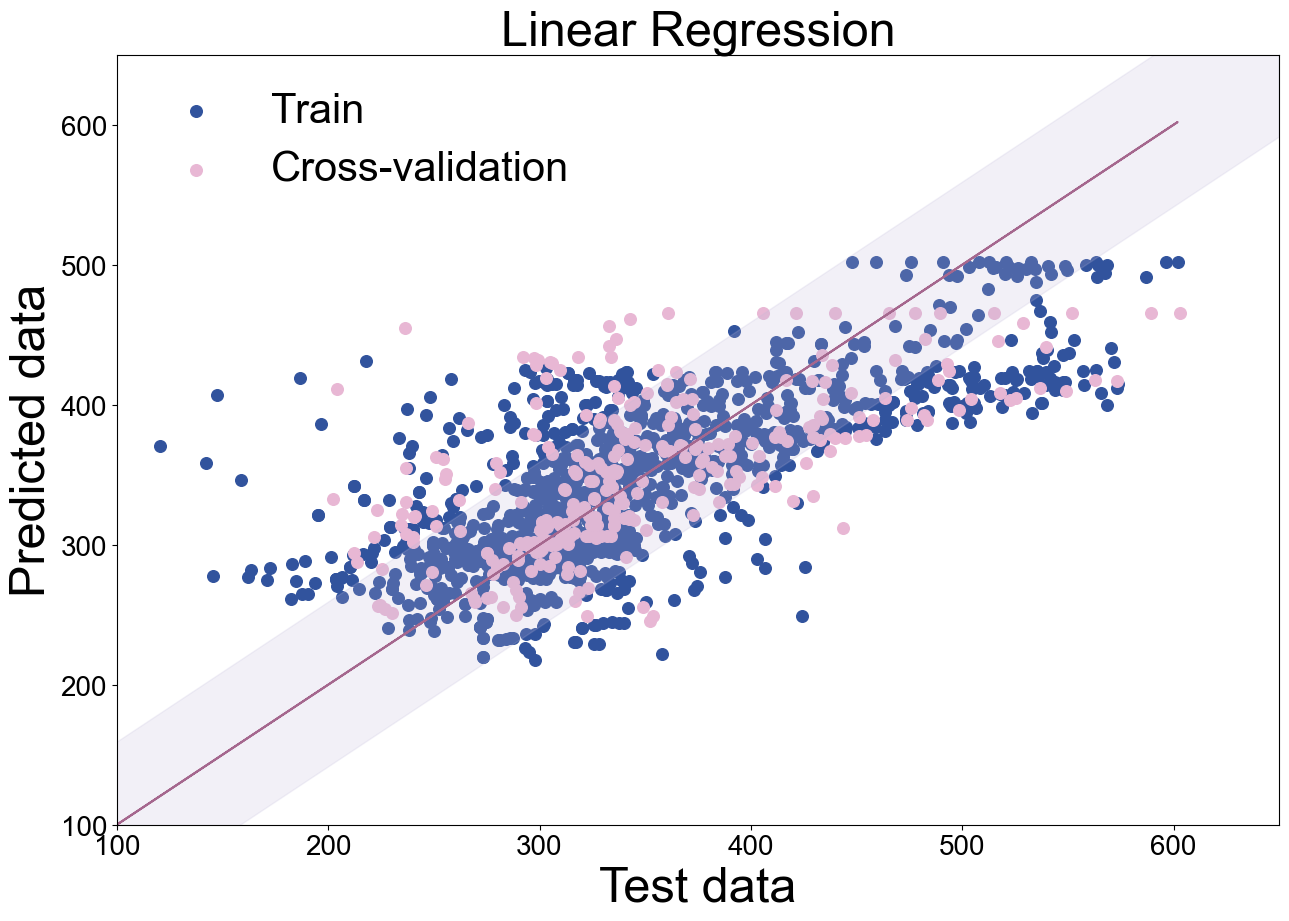

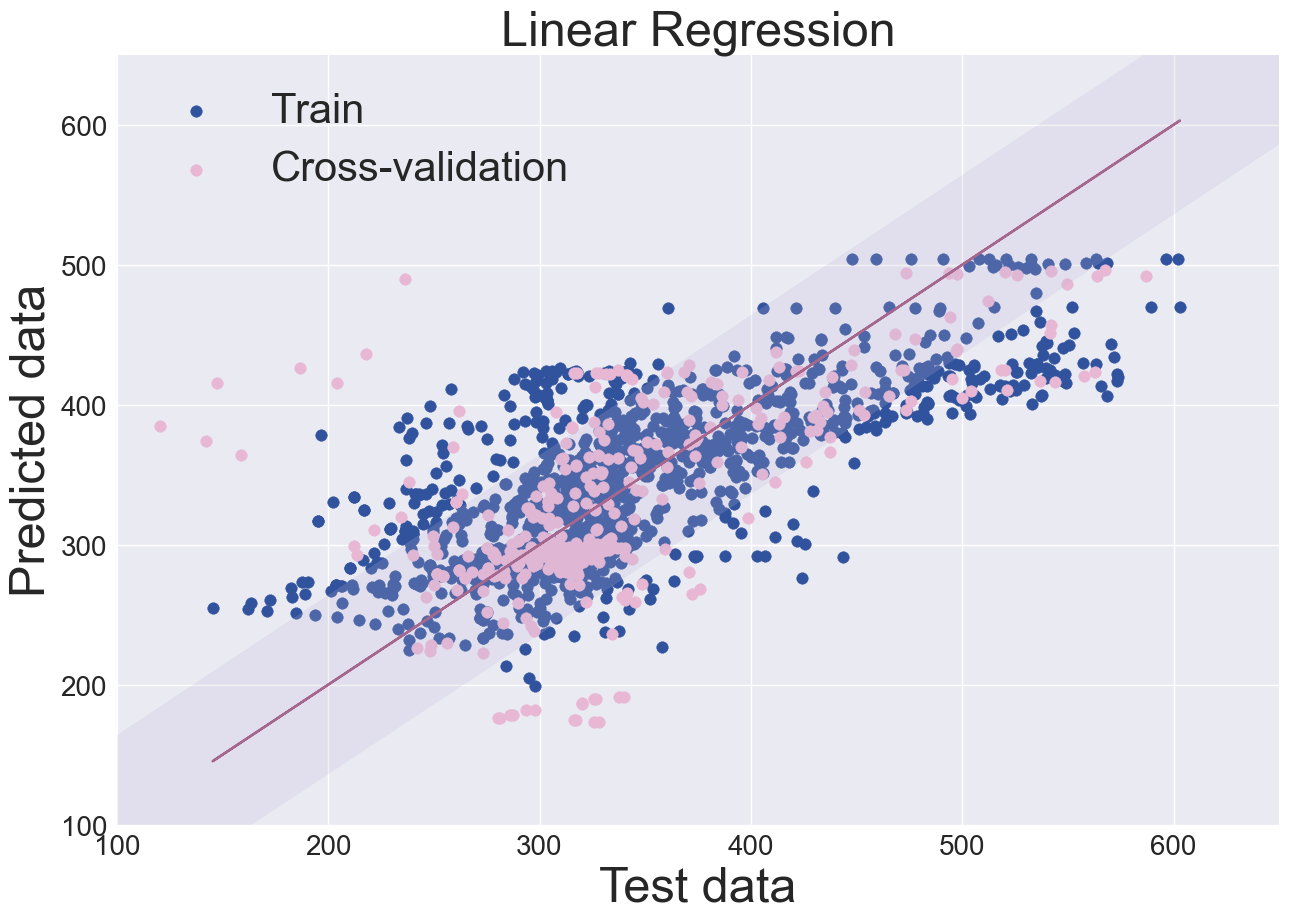

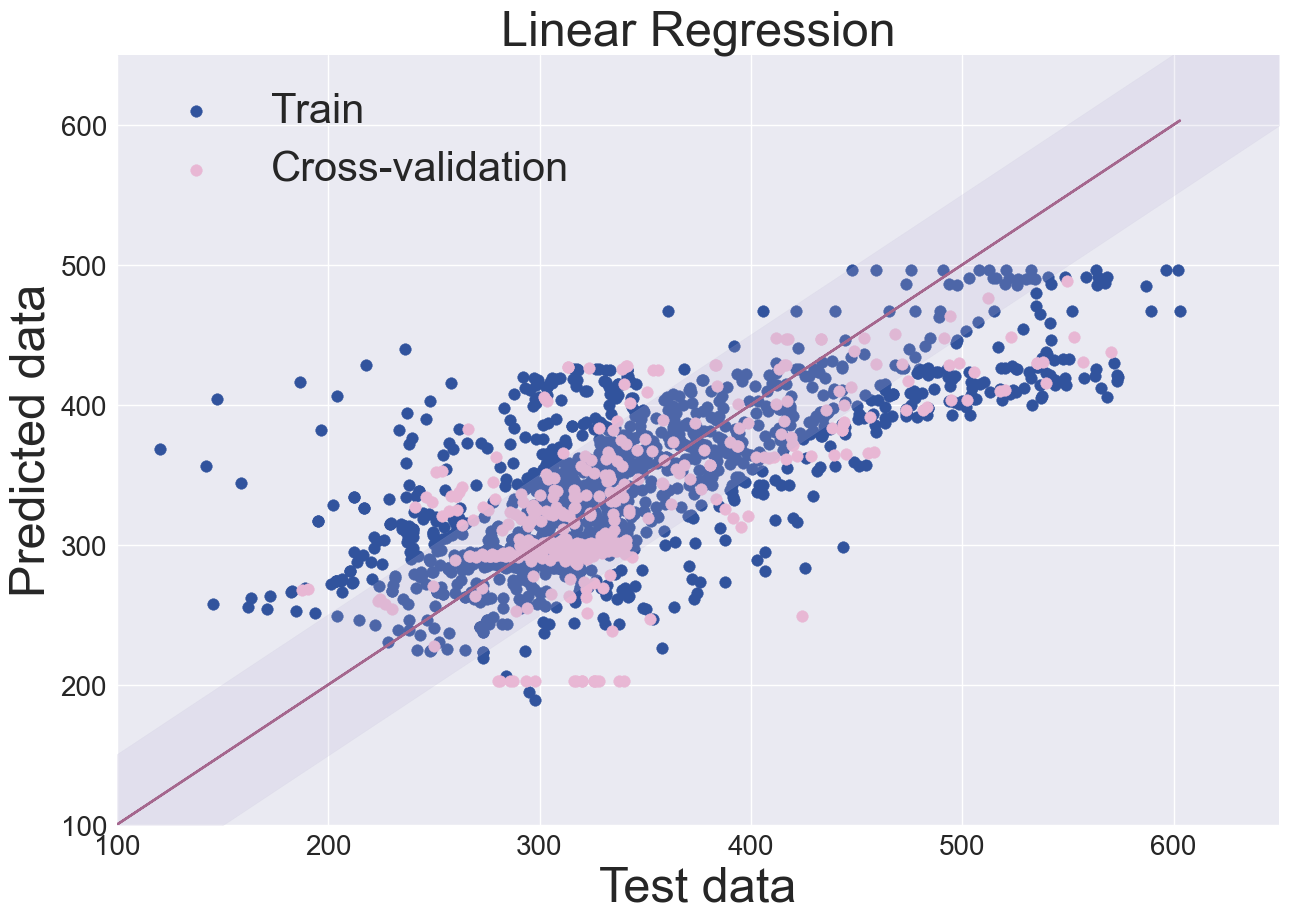

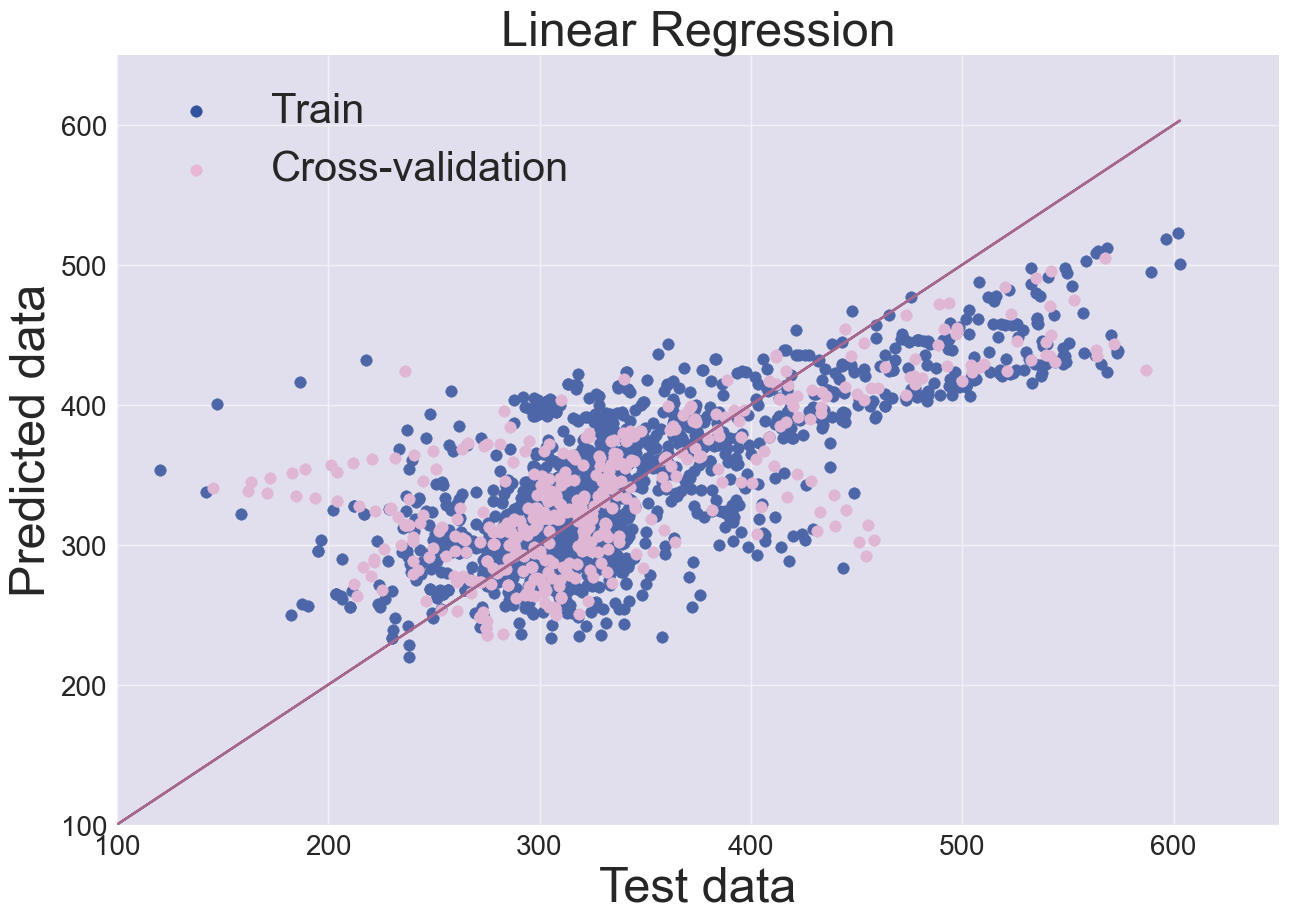

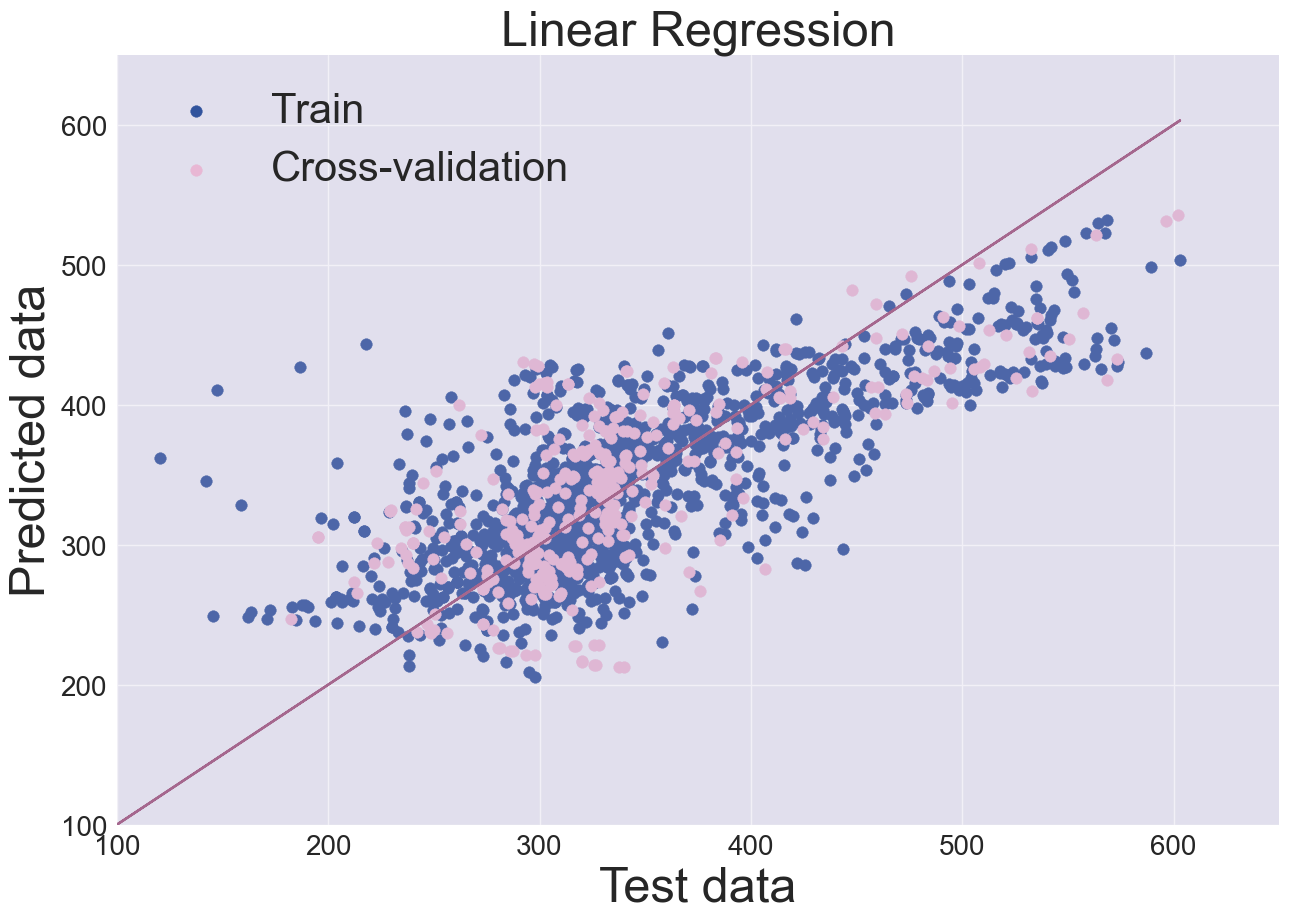

+-------------------------------------------------------------------------------------------------------------------------------------------+
|                                                              LinearRegression                                                             |
+------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+
|  metrics   |        mean        |          1          |         2          |         3          |         4          |         5          |
+------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+
|   R2 CV    | -1257.427050758585 | 0.38232442579560555 | 0.2547281659473719 | 0.4233064091881614 | -2196.726725485231 | -4091.468887308625 |
|  RMSE CV   | 1735.462983359807  |  58.83419226395591  | 63.719626186366185 | 50.42048929737684  | 3734.960771934334  | 4769.3798371170005 |
|  R2 

In [ ]:
param_grid = {
    'alpha': best_param['alpha']
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = Ridge(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('Linear Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.style.use('seaborn')
    plt.show()

table1 = PrettyTable()
table1.title = "LinearRegression" # в колабе не работает, в vs code работает
table1.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table1.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table1.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table1.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table1.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table1)

lr_type = compute_type(xy_list, model)

**Output:** Linear regression has low accuracy characteristics, but can be used to compare other methods with it

## 3. Decision trees
A decision tree is a logical classification algorithm that solves classification and regression problems. It is a combination of logical conditions into a tree structure.

### 3.1. Decision Tree Regressor
A decision tree is a decision-making tool that uses a tree-like structure similar to a flowchart, or is a model of decisions and all their possible outcomes, including outcomes, input costs and utility.

In [ ]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None] + list(range(1, 20, 5)),
    'min_samples_split': np.arange(0.05, 1, 0.2),
    'min_samples_leaf': np.arange(0.05, 1, 0.2)
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = DecisionTreeRegressor(**param_grid)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

Number of combinations 500
The best combination of hyperparameters: {'criterion': 'poisson', 'max_depth': None, 'min_samples_split': 0.05, 'min_samples_leaf': 0.05}


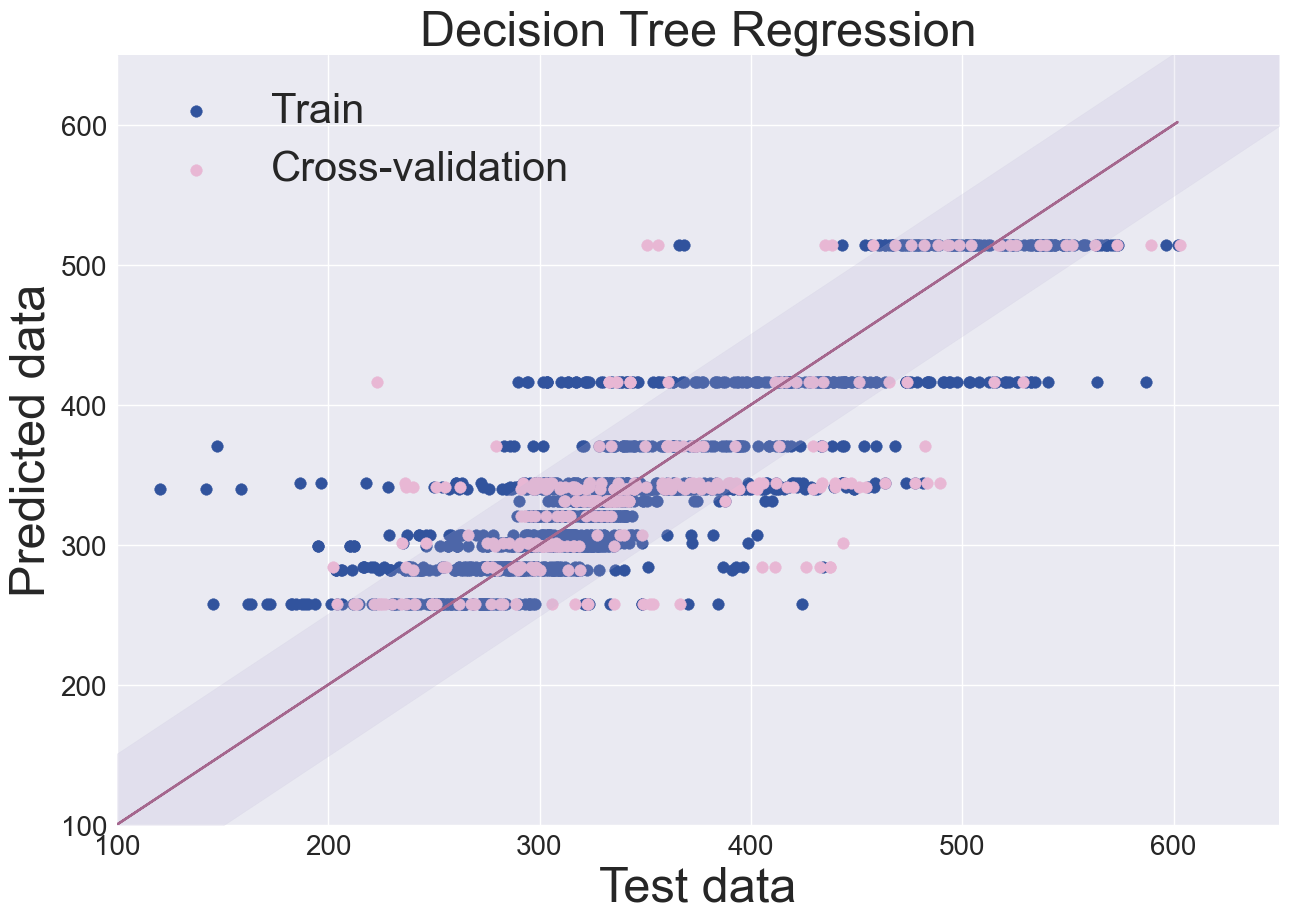

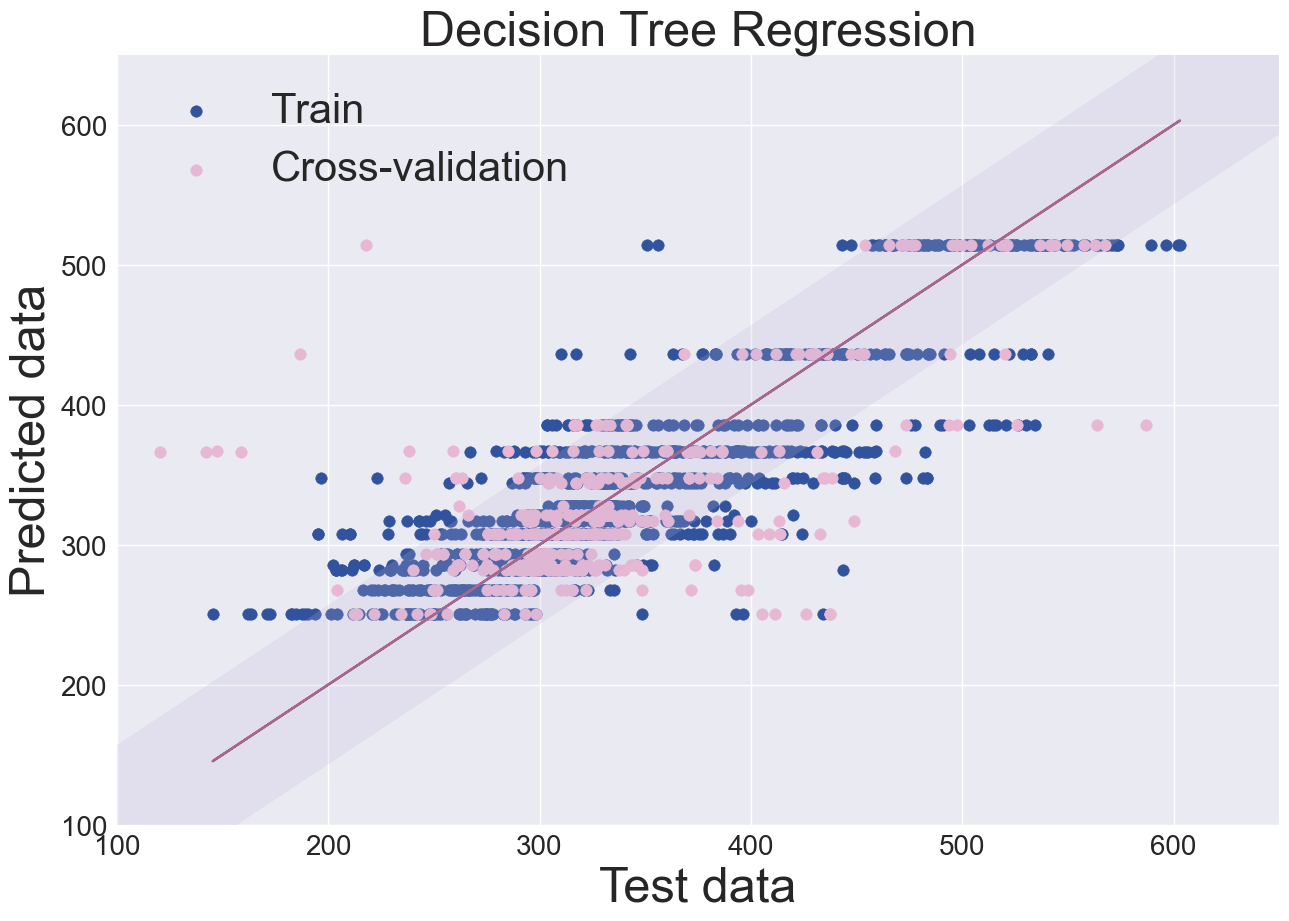

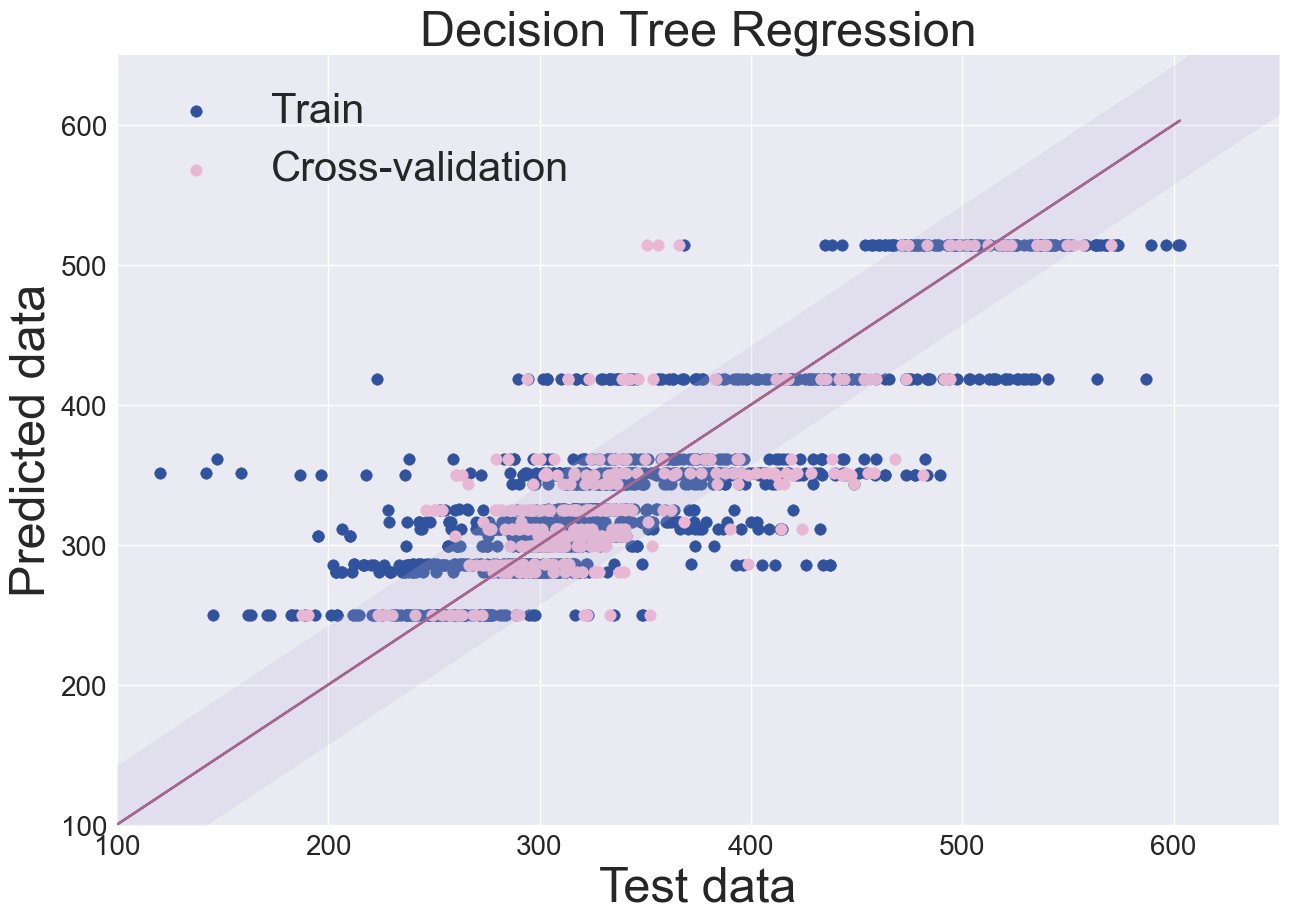

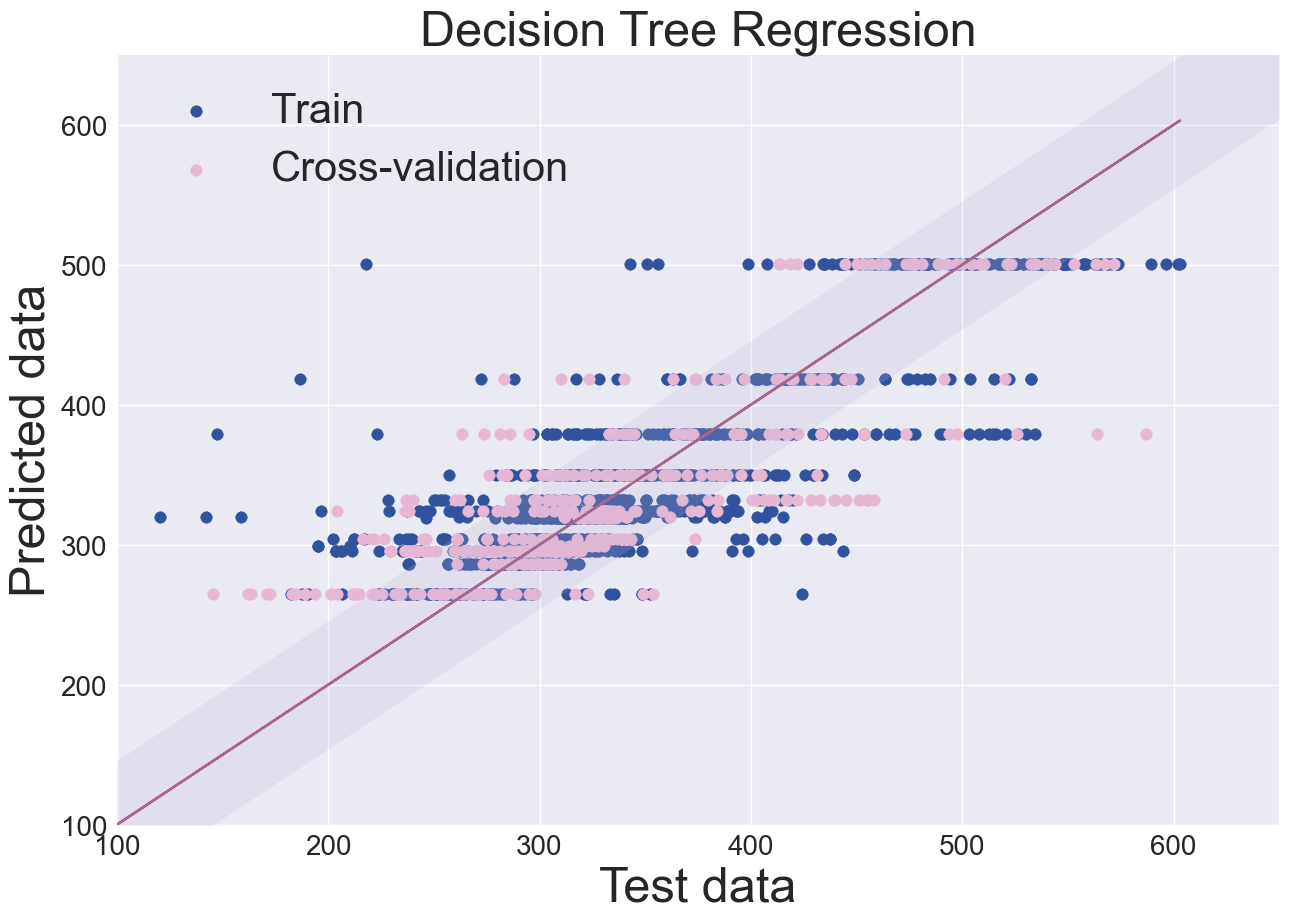

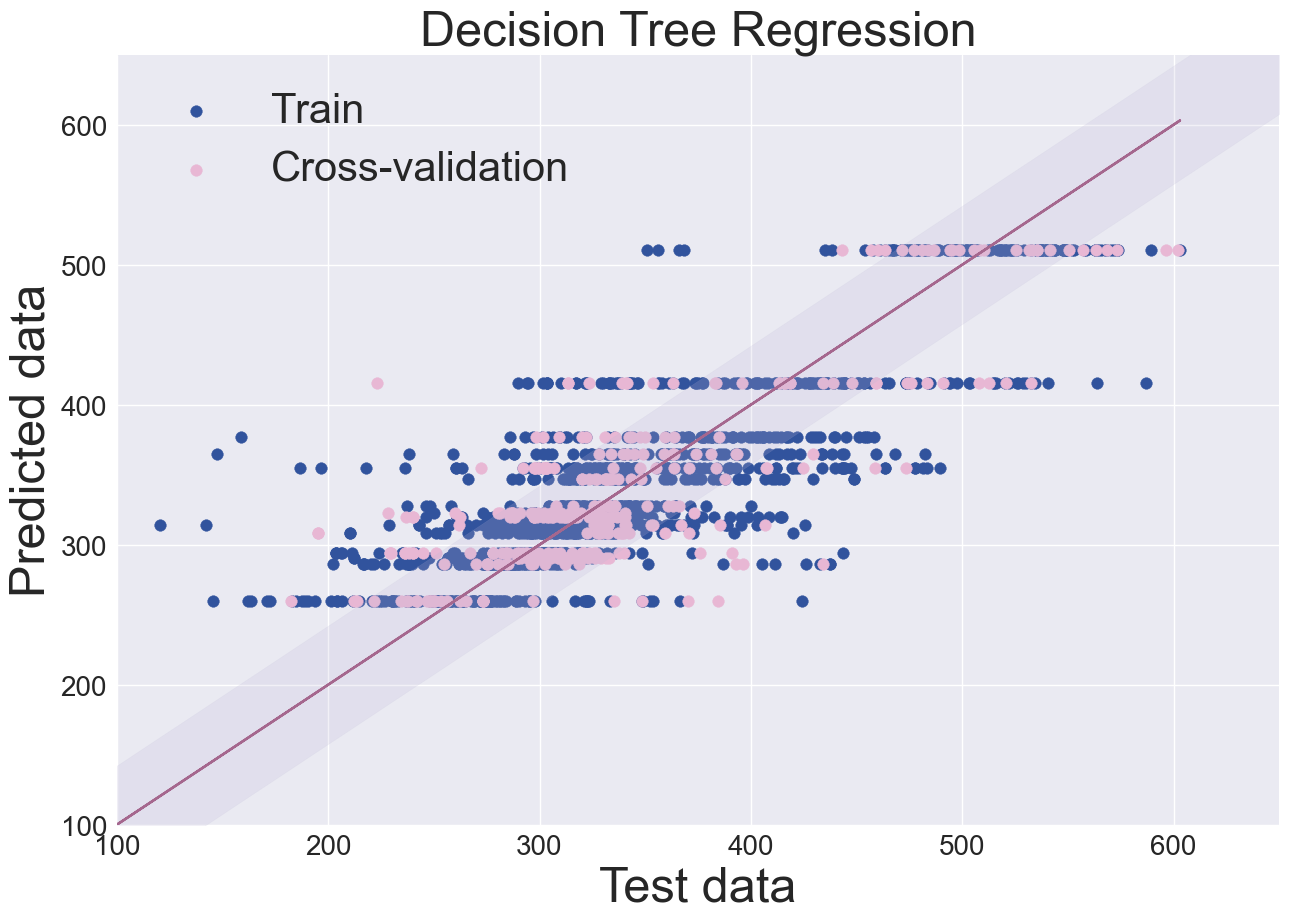

+-------------------------------------------------------------------------------------------------------------------------------------------+
|                                                          Decision Tree Regression                                                         |
+------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+
|  metrics   |        mean        |         1          |          2          |         3          |         4          |         5          |
+------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+
|   R2 CV    | 0.5800969465600744 | 0.5389695771227838 | 0.41251475128059756 | 0.5945358311892611 | 0.675319547863965  | 0.6791450253437645 |
|  RMSE CV   |  47.4615791381696  |  50.8293287006664  |  56.57366941101479  | 42.27763978378374  | 45.397012238523715 | 42.23024555685935  |
|  R2 

In [ ]:
param_grid = {
    'criterion': 'squared_error',
    'max_depth': None,
    'min_samples_split': 0.05,
    'min_samples_leaf': 0.05,
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = DecisionTreeRegressor(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('Decision Tree Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.style.use('seaborn')
    plt.show()

table8 = PrettyTable()
table8.title = "Decision Tree Regression" 
table8.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table8.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table8.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table8.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table8.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table8)

dtr_type = compute_type(xy_list, model)

### 3.2. Random Forest Regression
Random forest  is a collective learning method for classification, regression, and other tasks that works by building multiple decision trees during training. For regression problems, the average value or the averaged forecast of individual trees is returned.

In [ ]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [None] + list(range(1, 40, 5)),
    'min_samples_split': range(10, 100, 20),
    'min_samples_leaf': range(10, 100, 20),
    'max_features': [10],
    'bootstrap': [True, False]
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = RandomForestRegressor(**param_grid)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

Number of combinations 450
The best combination of hyperparameters: {'n_estimators': 100, 'max_depth': 26, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 10, 'bootstrap': False}


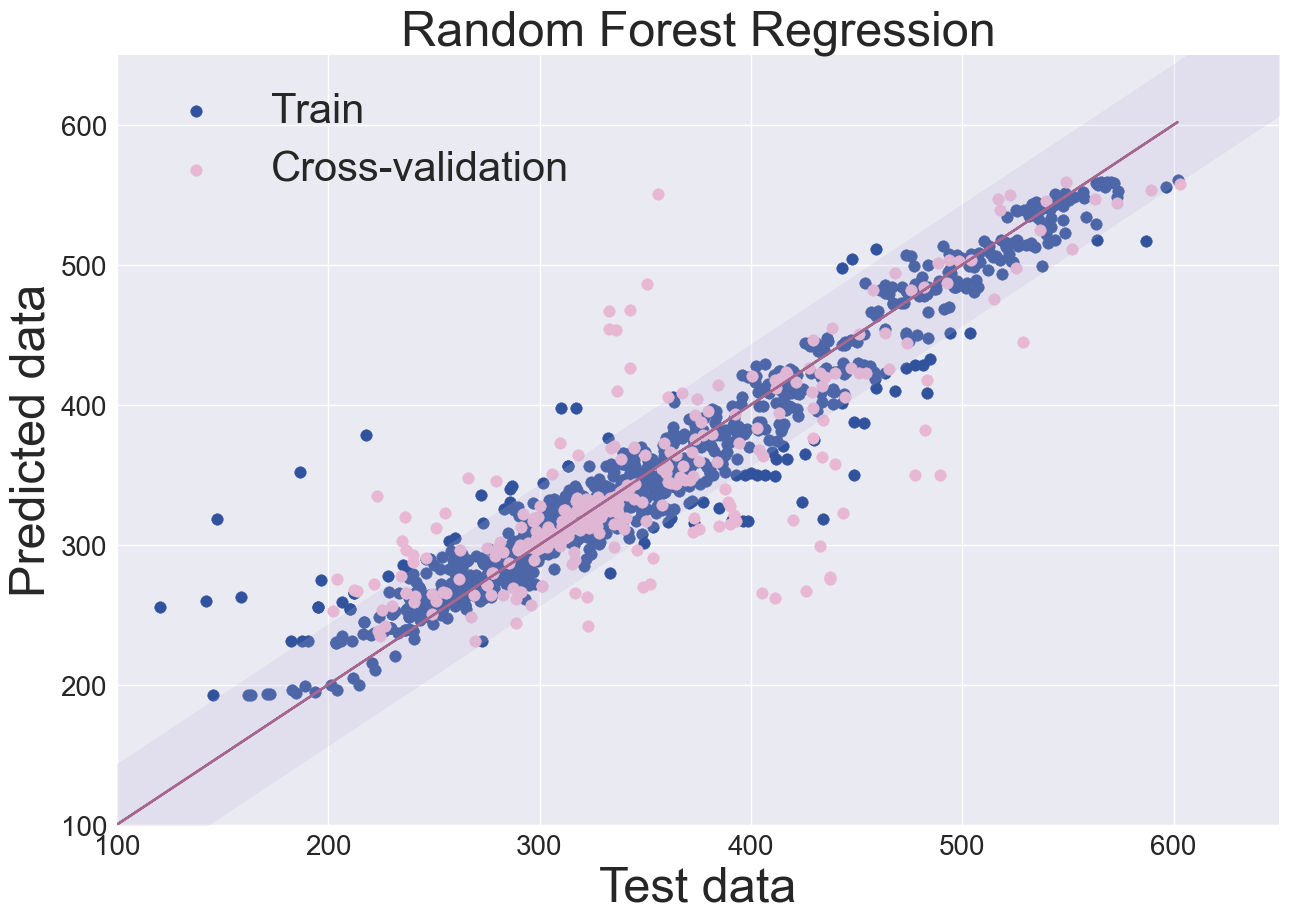

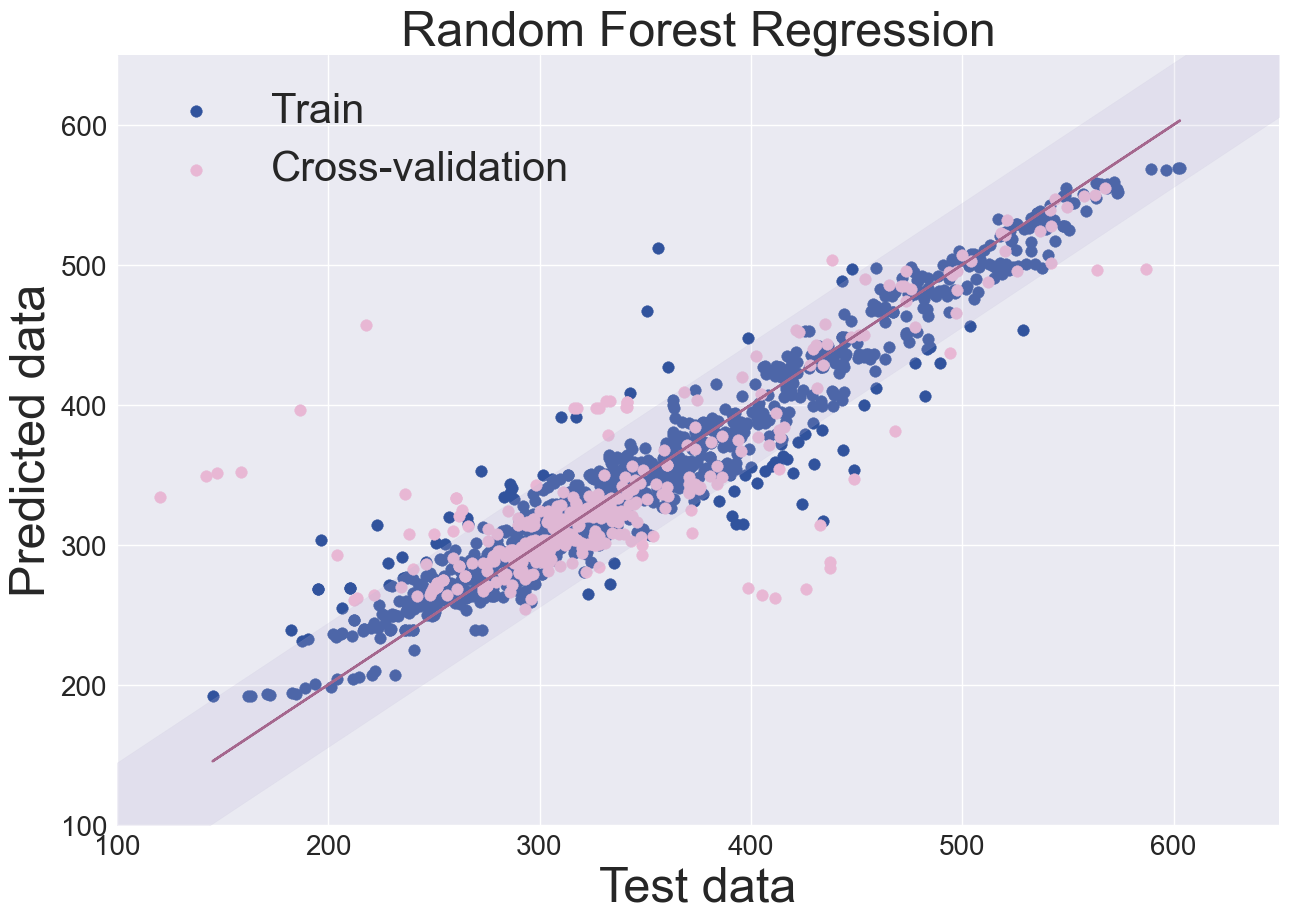

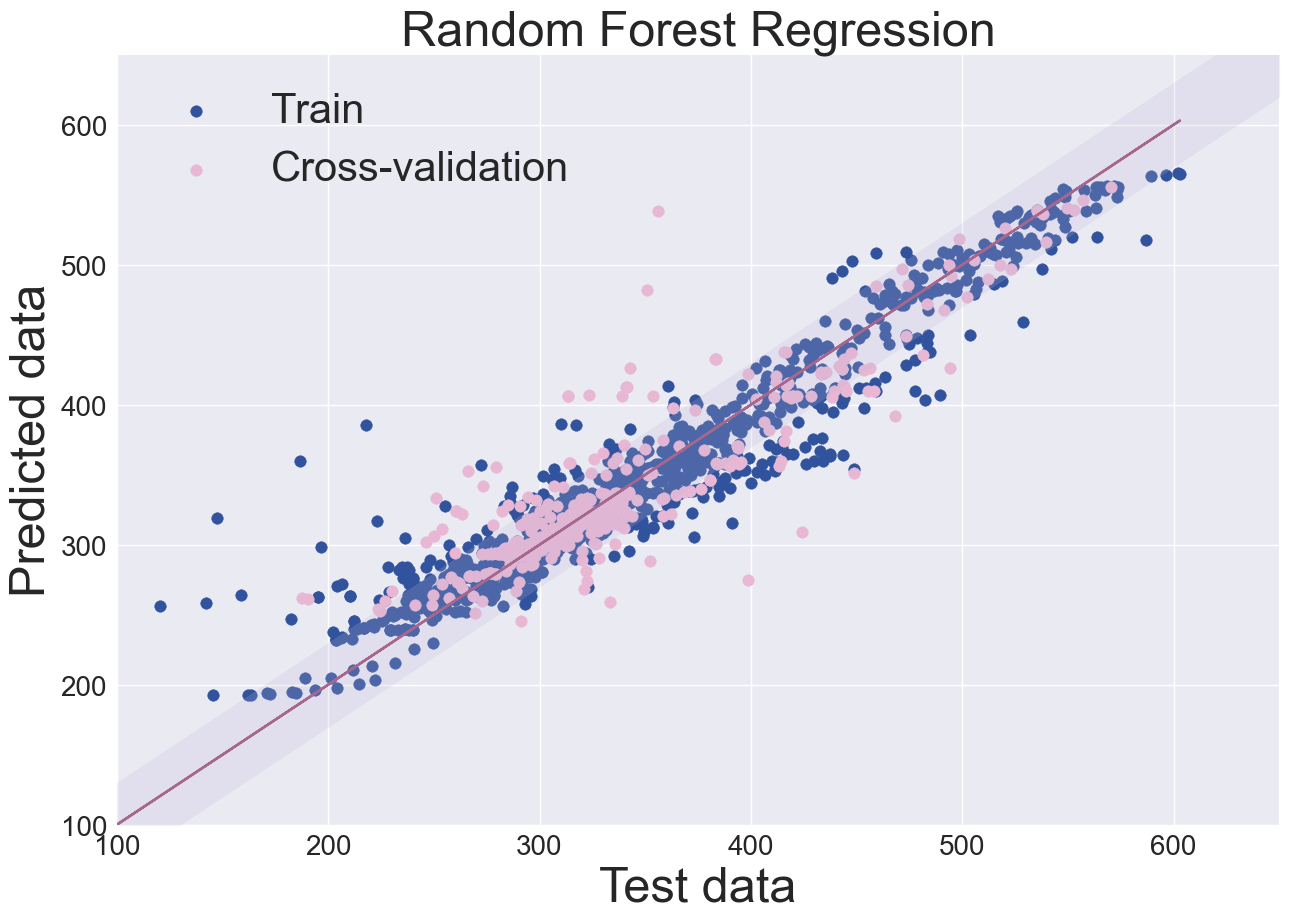

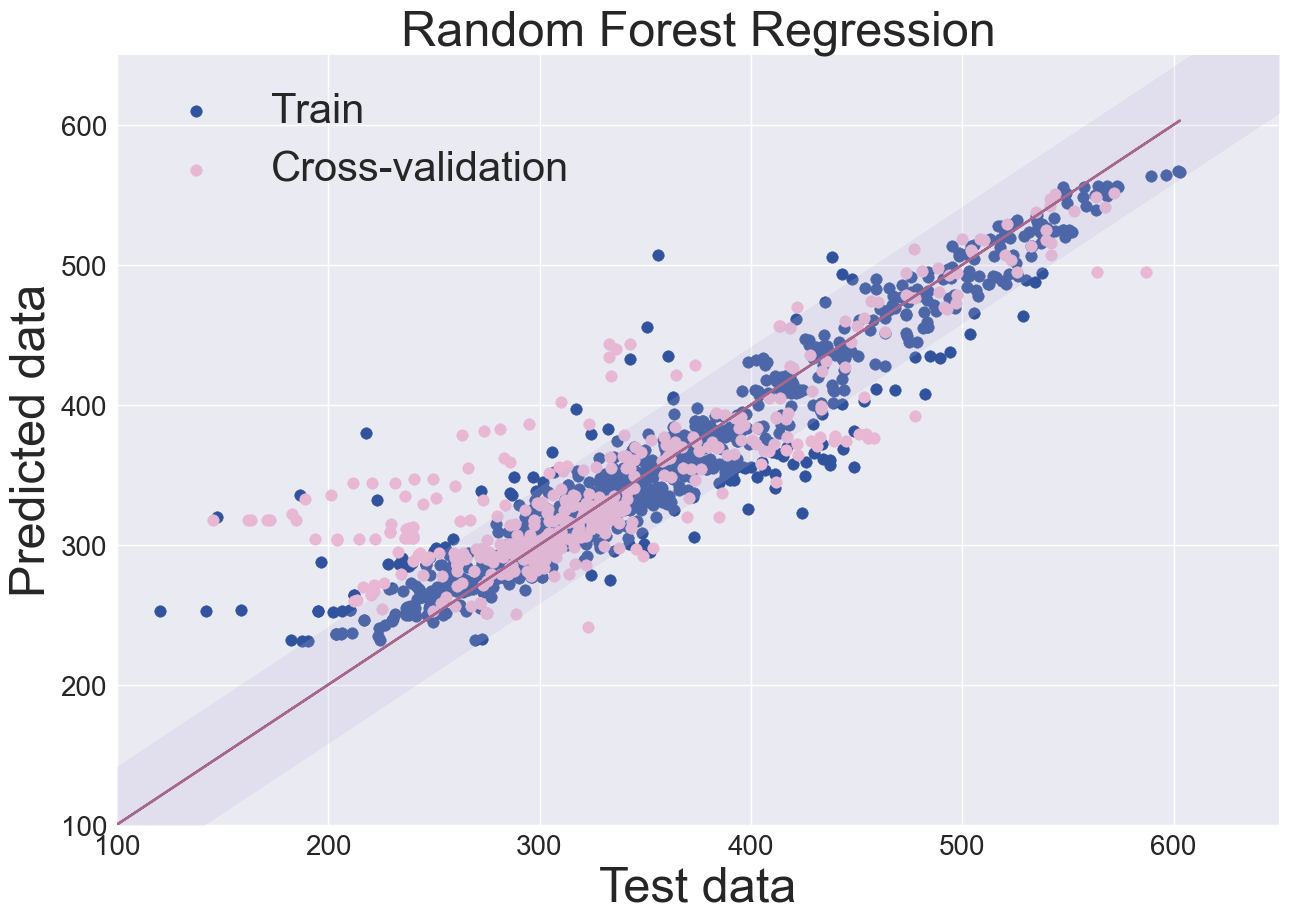

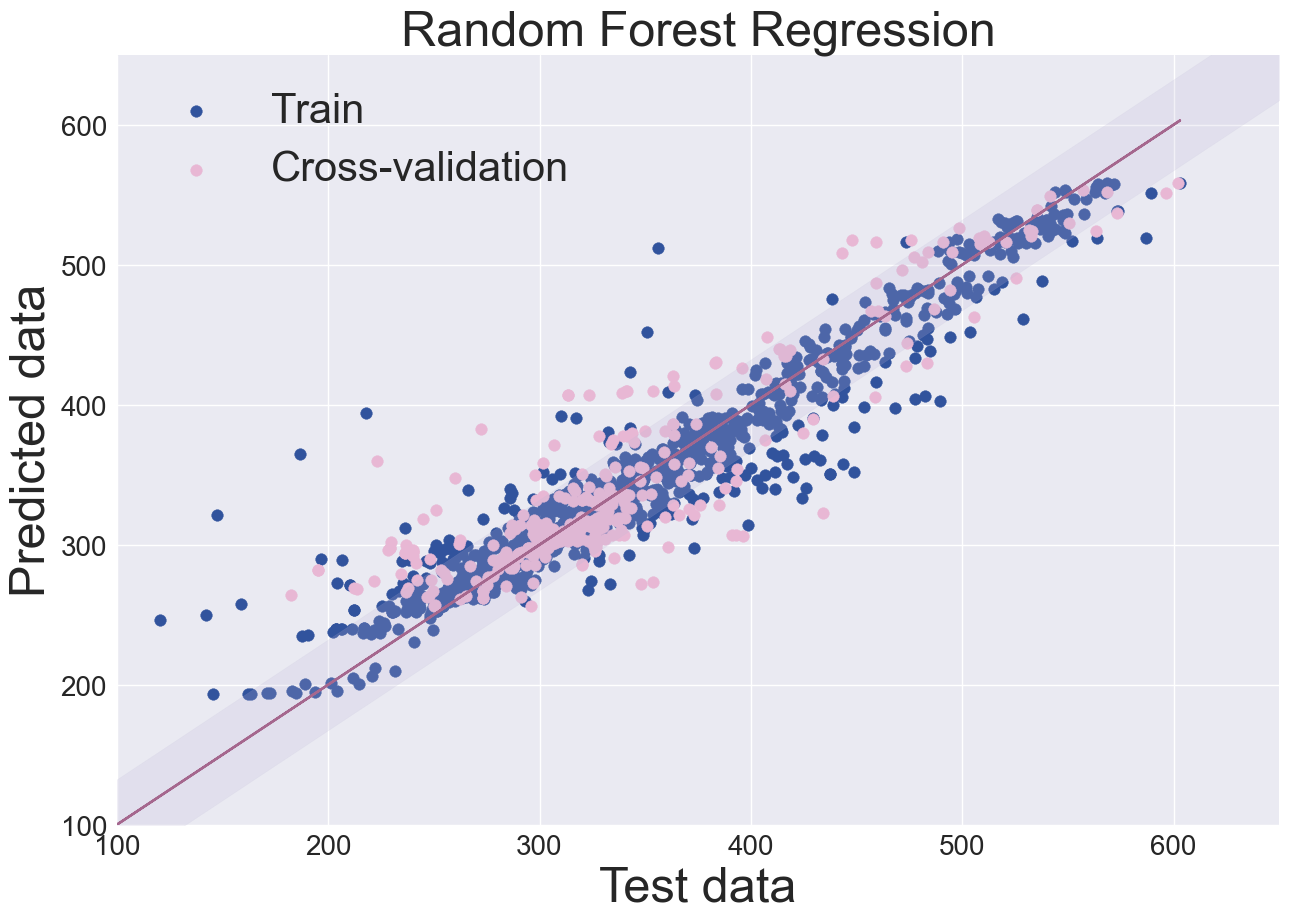

+------------------------------------------------------------------------------------------------------------------------------------------+
|                                                         Random Forest Regression                                                         |
+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  metrics   |        mean        |         1          |         2          |         3          |         4          |         5          |
+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   R2 CV    | 0.7282111265235099 | 0.6652037866083472 | 0.6389114772265474 | 0.7961432220333272 | 0.7296238653521316 | 0.8111732813971959 |
|  RMSE CV   | 38.29388793170053  | 43.315152750513576 | 44.35297007460467  | 29.97761456265135  | 41.42698981635338  | 32.396712454379696 |
|  R2 Train  

In [ ]:
param_grid = {
    'n_estimators': 100,
    'max_depth': 36,
    'min_samples_split': 10,
    'min_samples_leaf': 10,
    'max_features': 10,
    'bootstrap': False
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = RandomForestRegressor(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('Random Forest Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.style.use('seaborn')
    plt.show()

table2 = PrettyTable()
table2.title = "Random Forest Regression" 
table2.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table2.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table2.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table2.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table2.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table2)

rfr_type = compute_type(xy_list, model)

**Output:** Decision trees work better than linear regression, but also with low accuracy


## 4. Boosting
Boosting is a procedure for sequentially constructing the composition of machine learning algorithms, when each subsequent algorithm seeks to compensate for the shortcomings of the composition of all previous algorithms.

### 4.1. Gradient Boosting Regression
Gradient Boosting builds a prediction in the form of an ensemble of weak predictive models, which are mainly decision trees. Out of several weak models, one is eventually assembled, but already effective. The general idea of the algorithm is the consistent application of a predictor (predictor) in such a way that each subsequent model reduces the error of the previous one to a minimum.

In [ ]:
param_grid = {
    'learning_rate': np.arange(0.001, 1, 0.3),
    'n_estimators': range(100, 400, 100),
    'min_samples_split': np.arange(0.5, 1, 0.2),
    'min_samples_leaf': np.arange(0.05, 1, 0.4),
    'max_depth': [None] + list(range(1, 8, 2))
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = GradientBoostingRegressor(**param_grid)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

Number of combinations 540
The best combination of hyperparameters: {'learning_rate': 0.601, 'n_estimators': 200, 'min_samples_split': 0.5, 'min_samples_leaf': 0.05, 'max_depth': 3}


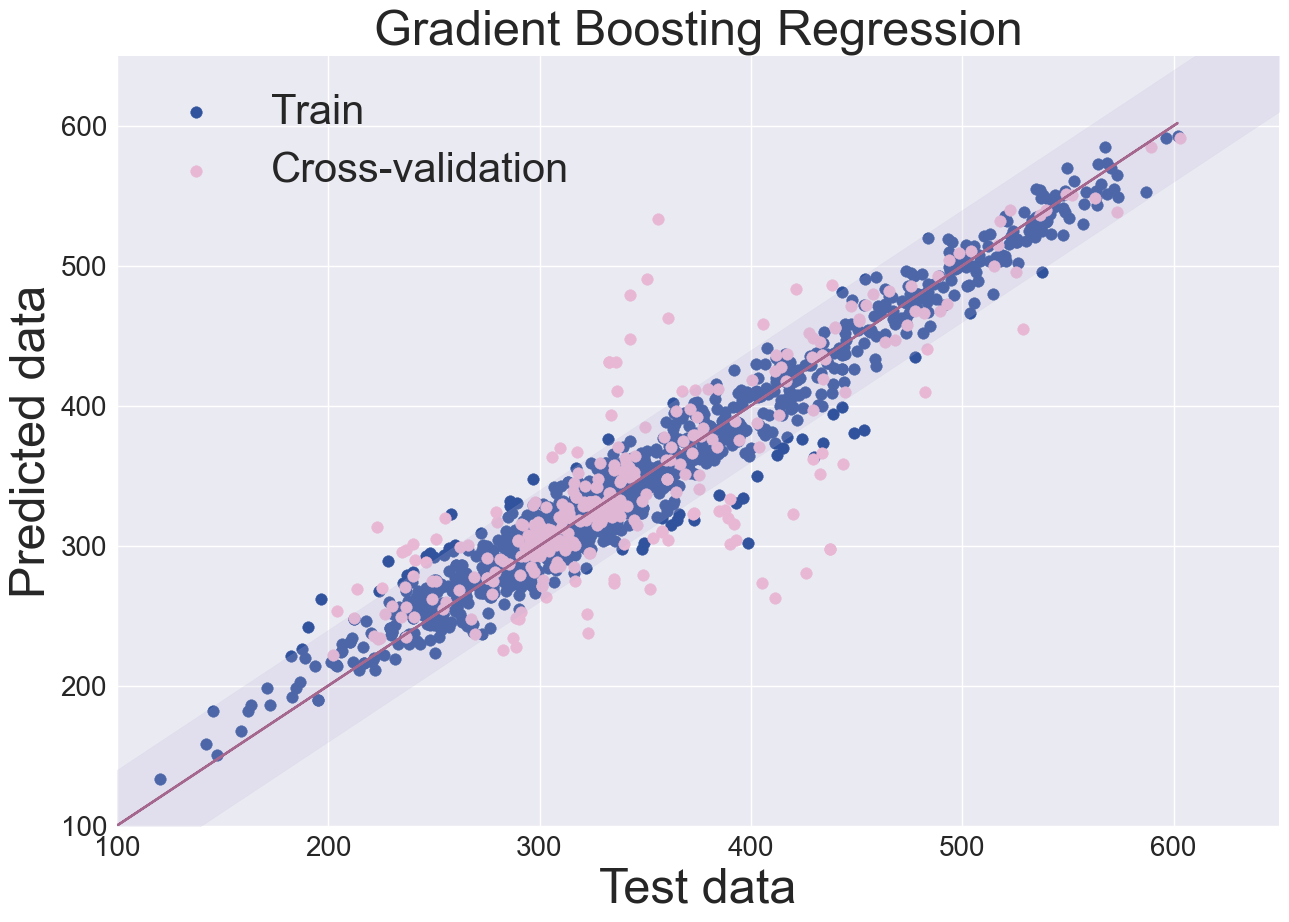

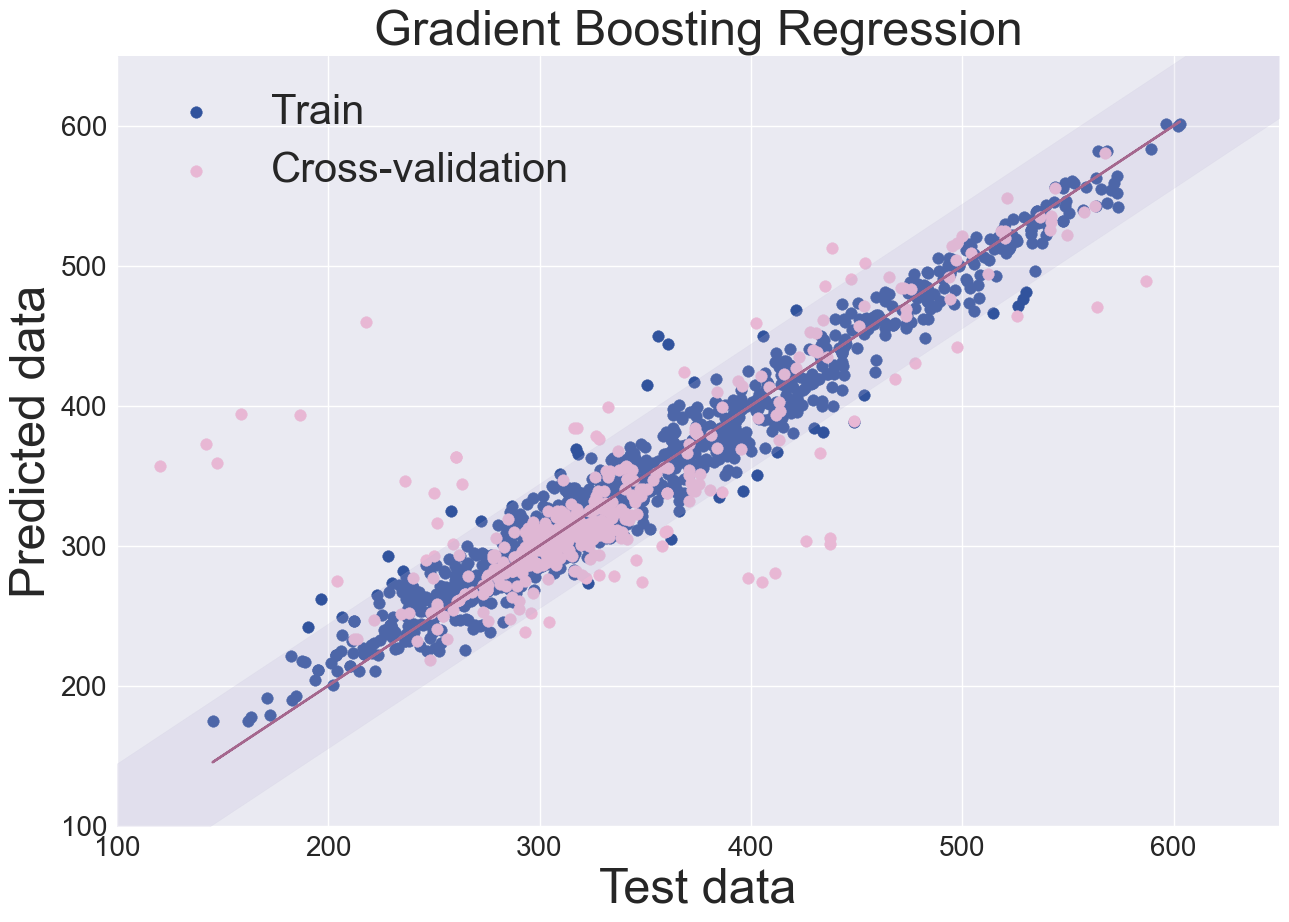

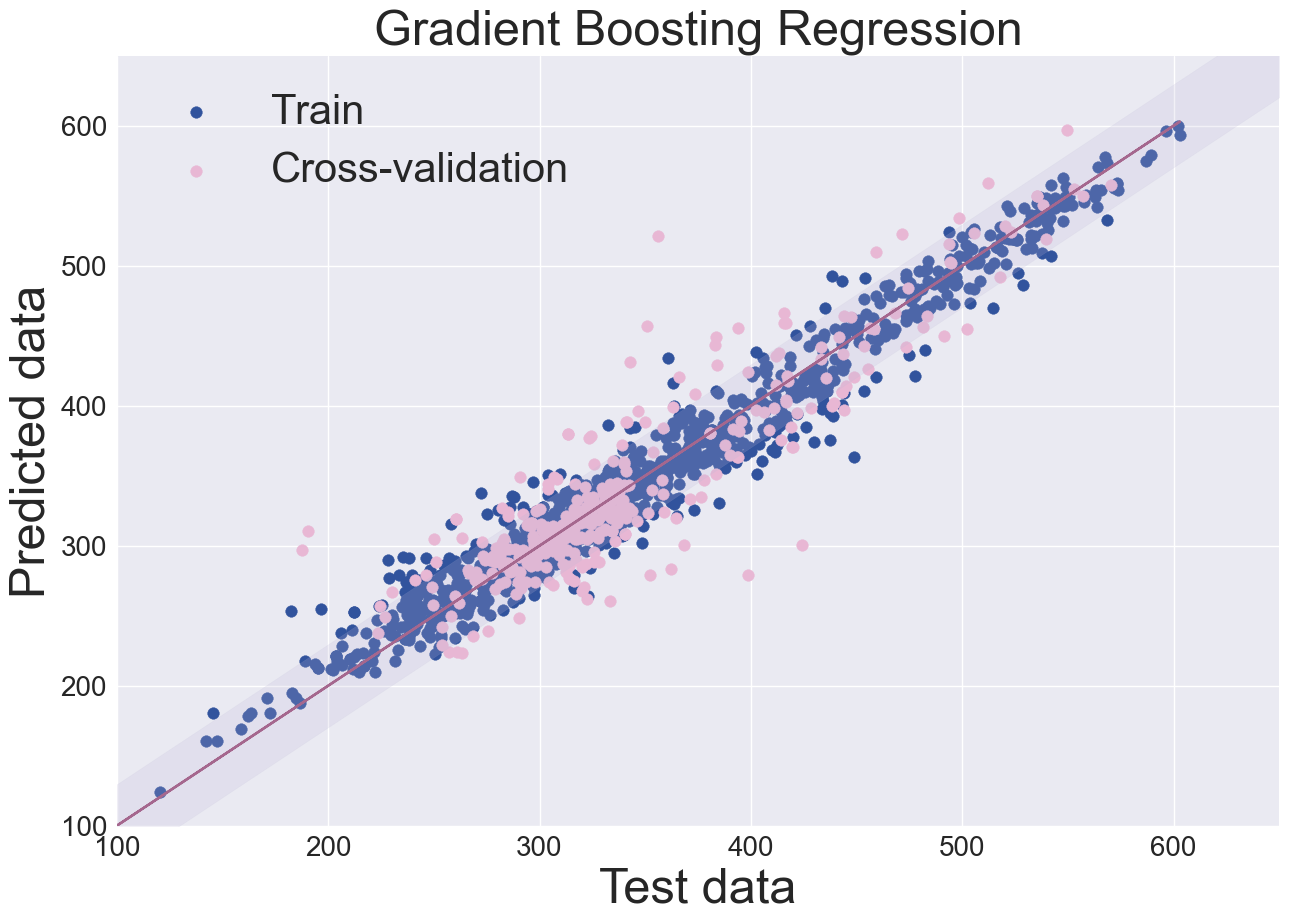

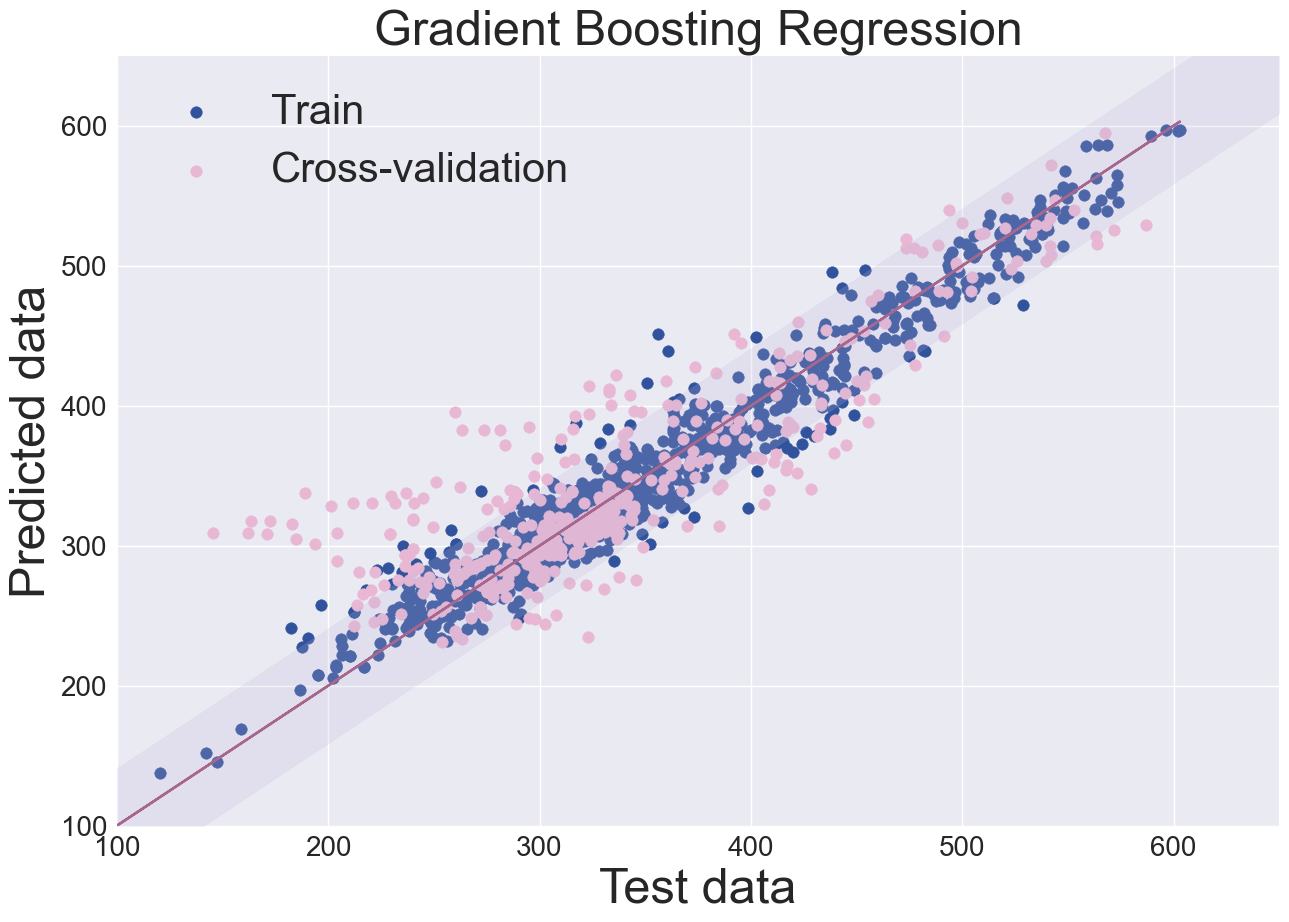

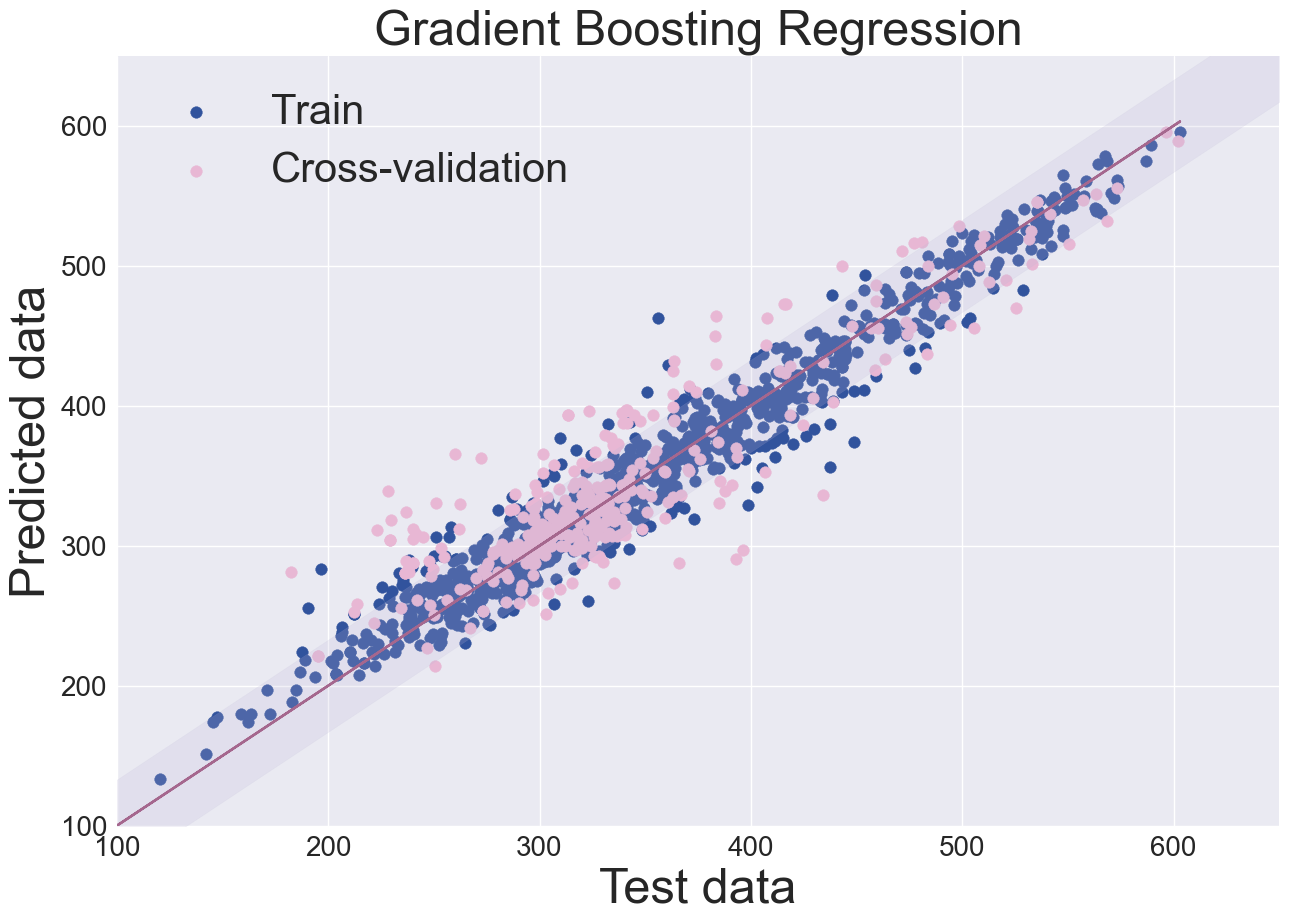

+------------------------------------------------------------------------------------------------------------------------------------------+
|                                                       Gradient Boosting Regression                                                       |
+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  metrics   |        mean        |         1          |         2          |         3          |         4          |         5          |
+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   R2 CV    | 0.7386605628761792 | 0.7160000839841785 | 0.6376483109581124 | 0.8009568948327538 | 0.733573692340667  | 0.8051238322651849 |
|  RMSE CV   |  37.5962001085323  | 39.89410141734581  | 44.43048051958074  | 29.621569275885353 | 41.12328059884493  | 32.911568731004635 |
|  R2 Train  

In [ ]:
param_grid = {
    'learning_rate': 0.601,
    'n_estimators': 300,
    'min_samples_split': 0.5,
    'min_samples_leaf': 0.05,
    'max_depth': 3
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = GradientBoostingRegressor(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('Gradient Boosting Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.style.use('seaborn')
    plt.show()

table7 = PrettyTable()
table7.title = "Gradient Boosting Regression" 
table7.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table7.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table7.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table7.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table7.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table7)

gbr_type = compute_type(xy_list, model)

### 4.2. Cat Boosting Regression
CatBoost is a gradient boosting library. She uses oblivious decision trees to grow a balanced tree. The same functions are used to create left and right splits at each level of the tree.

In [ ]:
param_grid = {
    'learning_rate': np.arange(0.001, 0.35, 0.05),
    'depth': range(1, 9, 1),
    'l2_leaf_reg': [10],
    'iterations': [100, 200, 400],
    'border_count': [50, 150, 250],
    'bagging_temperature': [4],
    'random_strength': [4]
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = CatBoostRegressor(**param_grid, verbose=False)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

Number of combinations 504
The best combination of hyperparameters: {'learning_rate': 0.251, 'depth': 6, 'l2_leaf_reg': 10, 'iterations': 100, 'border_count': 50, 'bagging_temperature': 4, 'random_strength': 4}


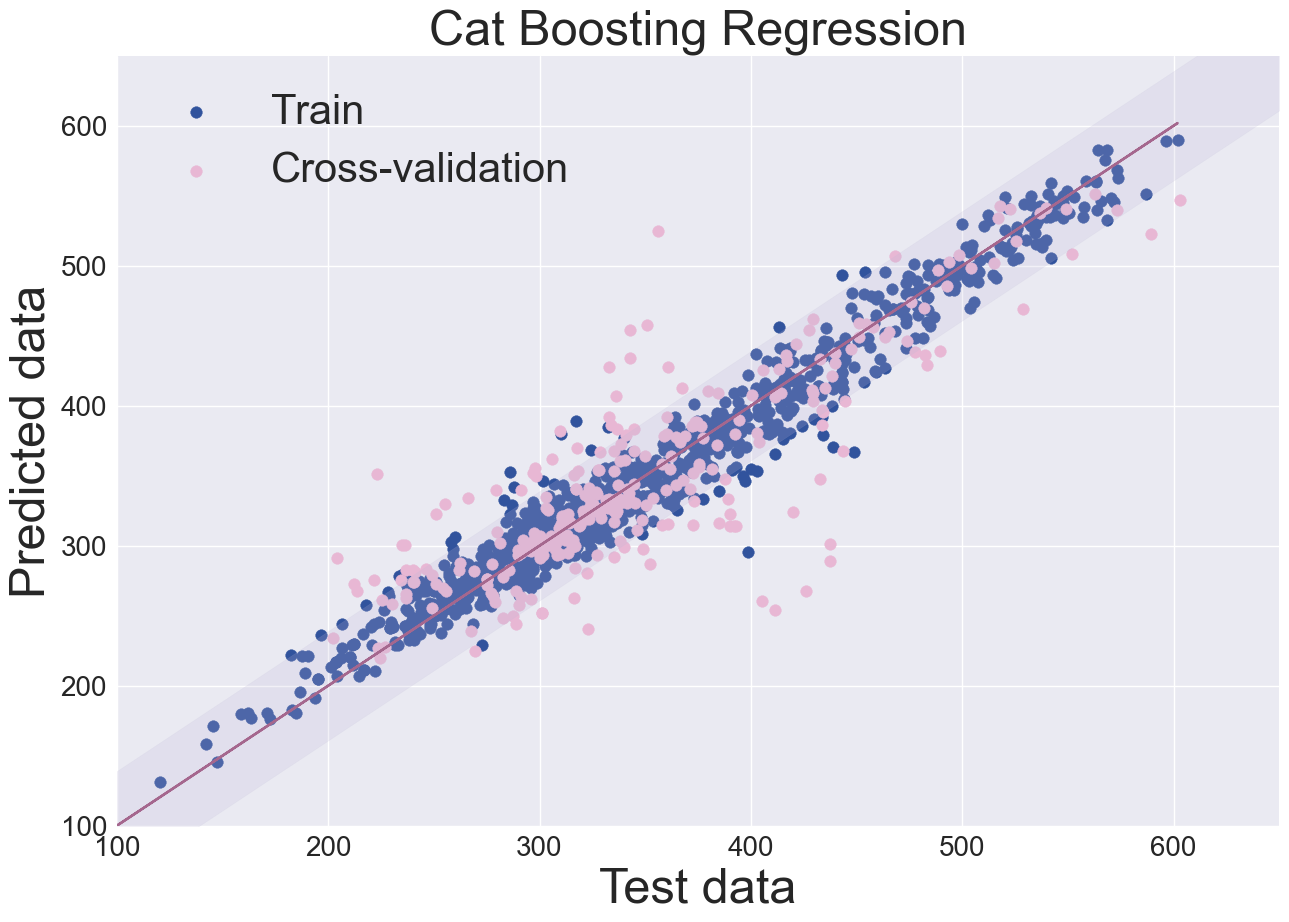

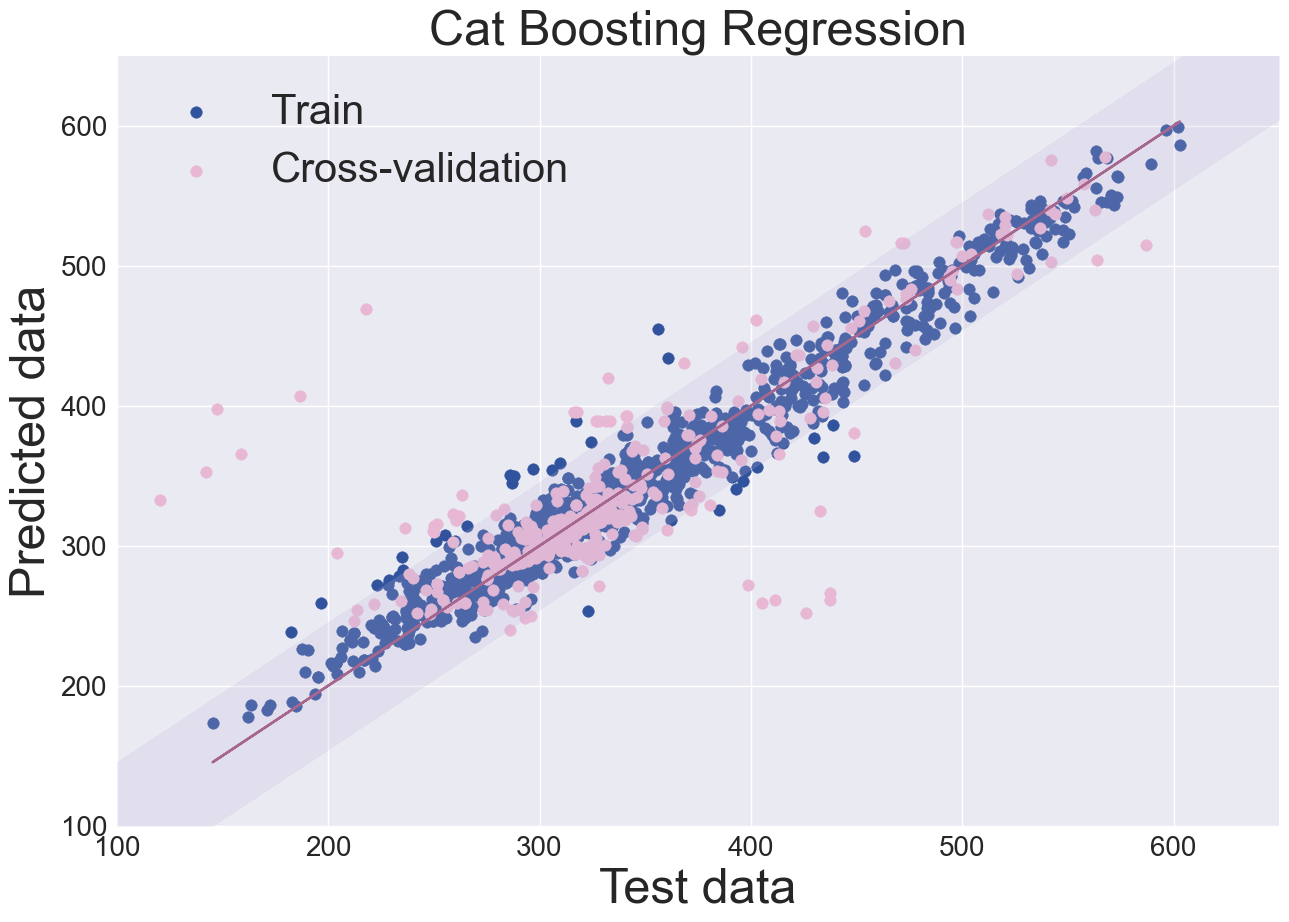

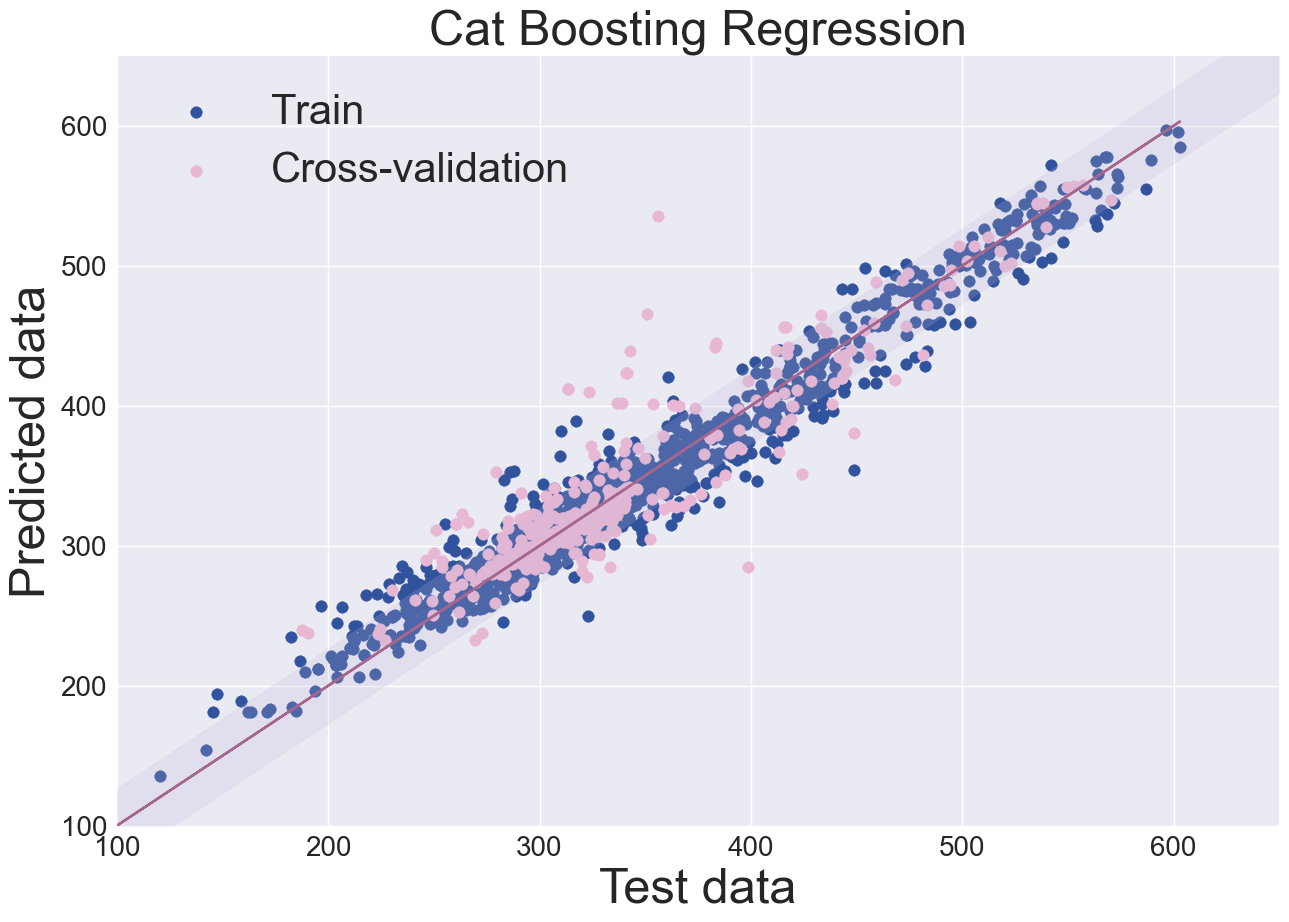

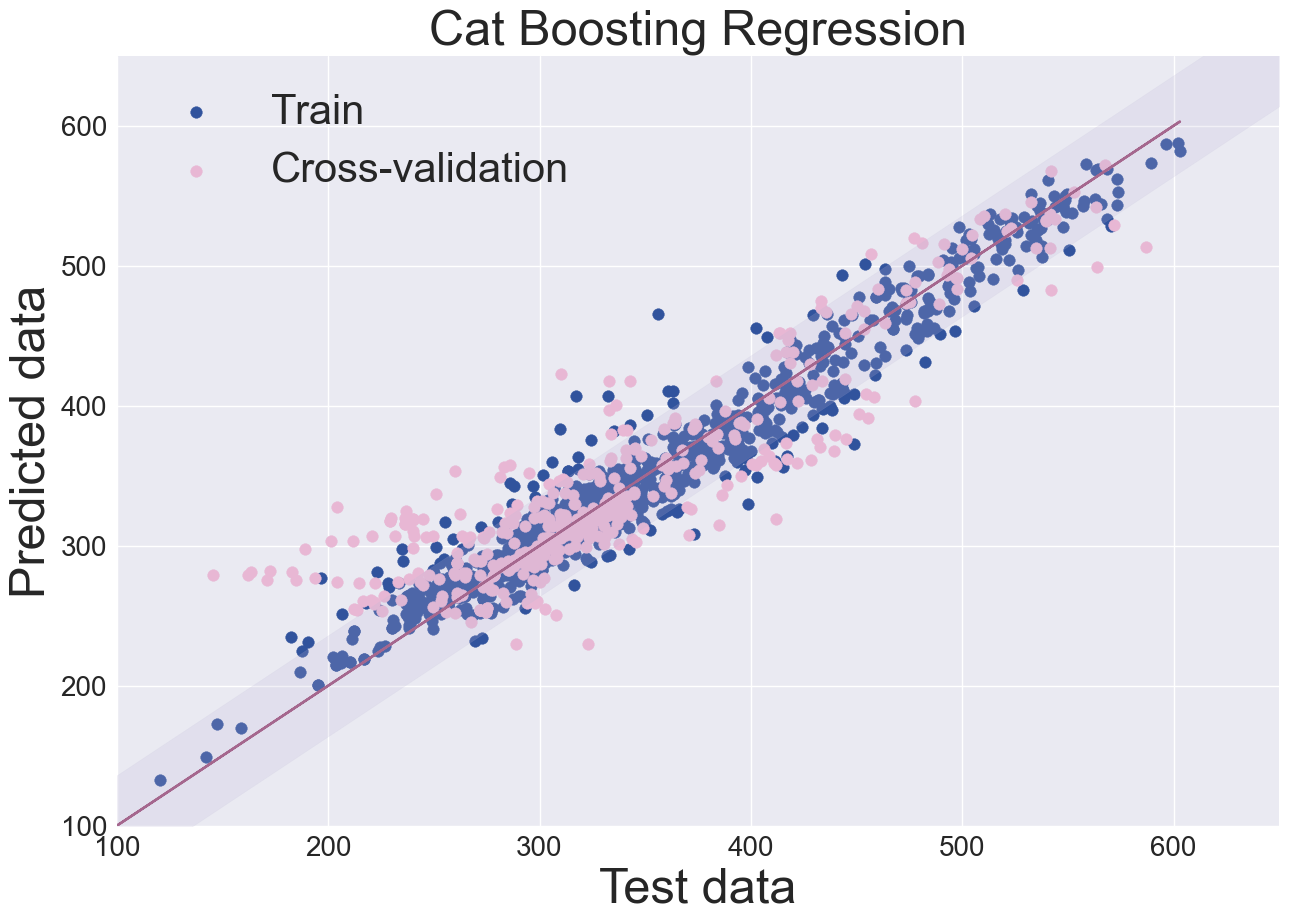

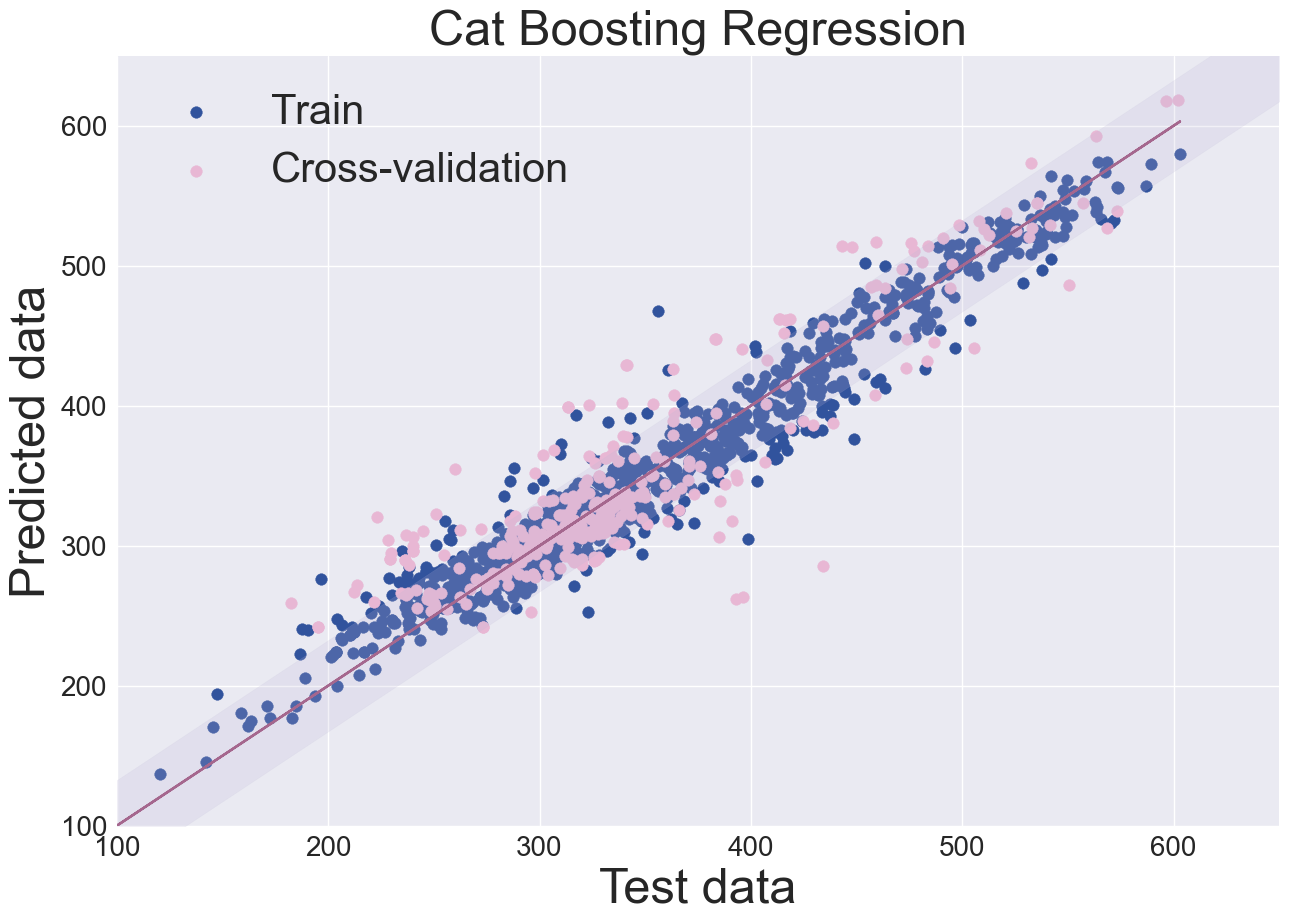

+------------------------------------------------------------------------------------------------------------------------------------------+
|                                                         Cat Boosting Regression                                                          |
+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  metrics   |        mean        |         1          |         2          |         3          |         4          |         5          |
+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   R2 CV    | 0.7574764638879787 | 0.728004934704799  | 0.6195243628773903 | 0.8354984111361063 | 0.7952377686750427 | 0.8091168420465551 |
|  RMSE CV   | 36.02461333659929  | 39.04182352160687  | 45.528075379715844 | 26.928957567173864 | 36.05156538270363  | 32.57264483179622  |
|  R2 Train  

In [ ]:
param_grid = {
    'learning_rate': 0.251,
    'depth': 6,
    'l2_leaf_reg': 10,
    'iterations': 100,
    'border_count': 50,
    'bagging_temperature': 4,
    'random_strength': 4
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = CatBoostRegressor(**param_grid, verbose=False)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('Cat Boosting Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.style.use('seaborn')
    plt.show()

table4 = PrettyTable()
table4.title = "Cat Boosting Regression" 
table4.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table4.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table4.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table4.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table4.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table4)

cbr_type = compute_type(xy_list, model)

### 4.3. Extreme Gradient Boosting (XGBoost)
The XGBoost is a computationally efficient implementation of gradient boosting over decision trees. In addition to the optimized program code, the authors propose various improvements to the algorithm.

In [ ]:
param_grid = {
    'n_estimators': range(10, 200, 40),
    'max_depth': range(1, 50, 7),
    'learning_rate': np.arange(0.01, 0.25, 0.02),
    'subsample': [0.9],
    'colsample_bytree': [0.65]
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = XGBRegressor(**param_grid)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

Number of combinations 420


The best combination of hyperparameters: {'n_estimators': 170, 'max_depth': 15, 'learning_rate': 0.03, 'subsample': 0.9, 'colsample_bytree': 0.65}


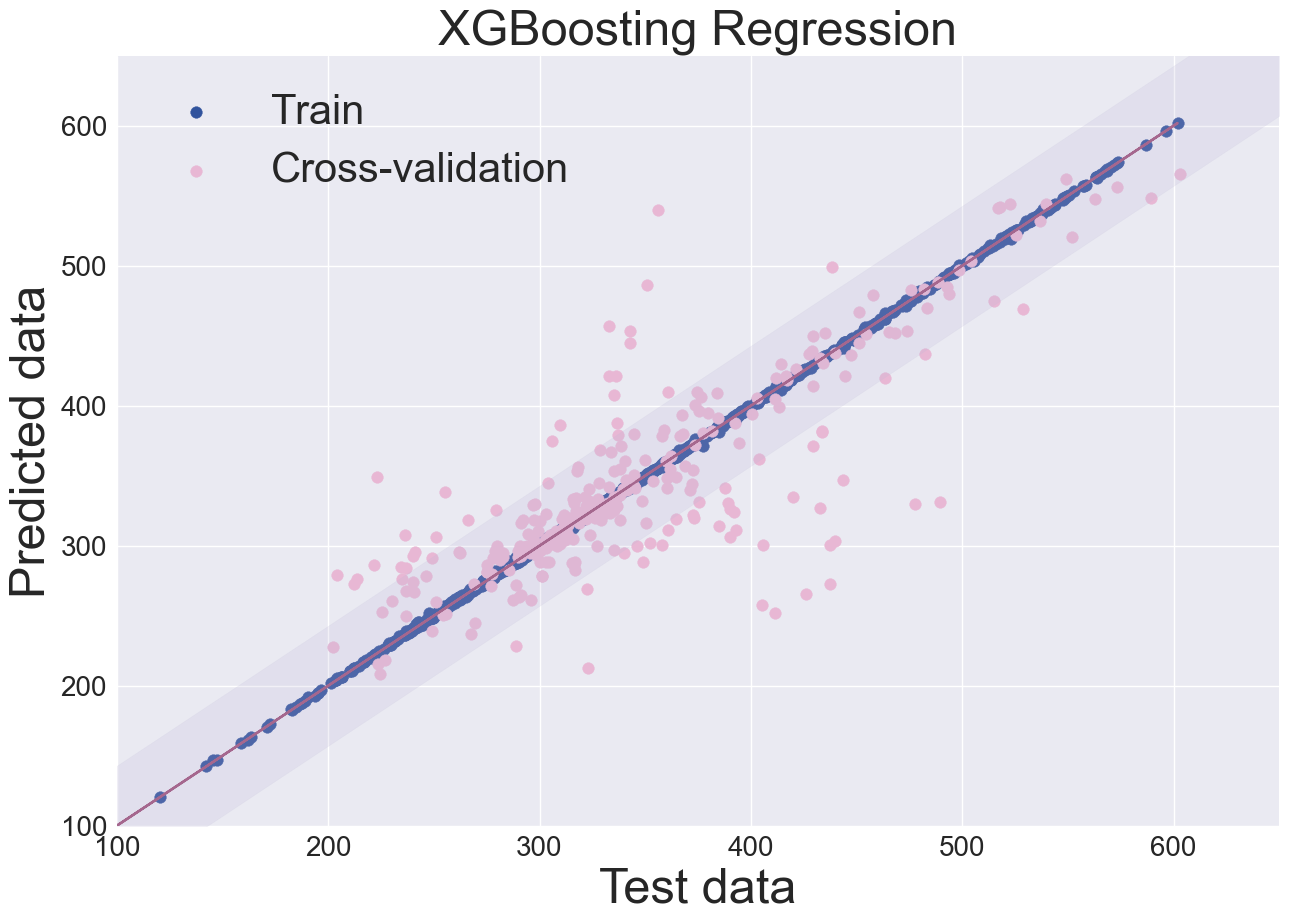

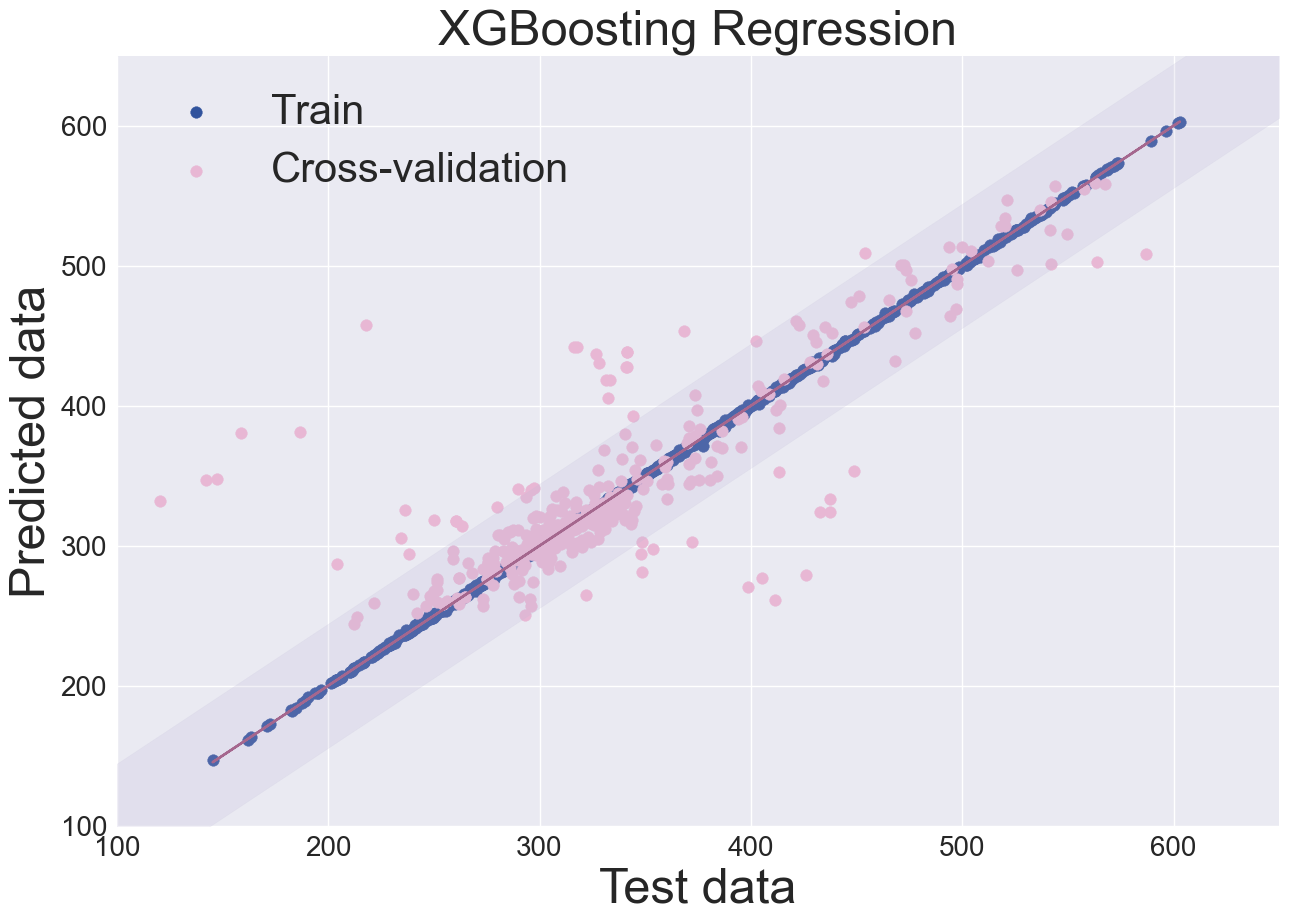

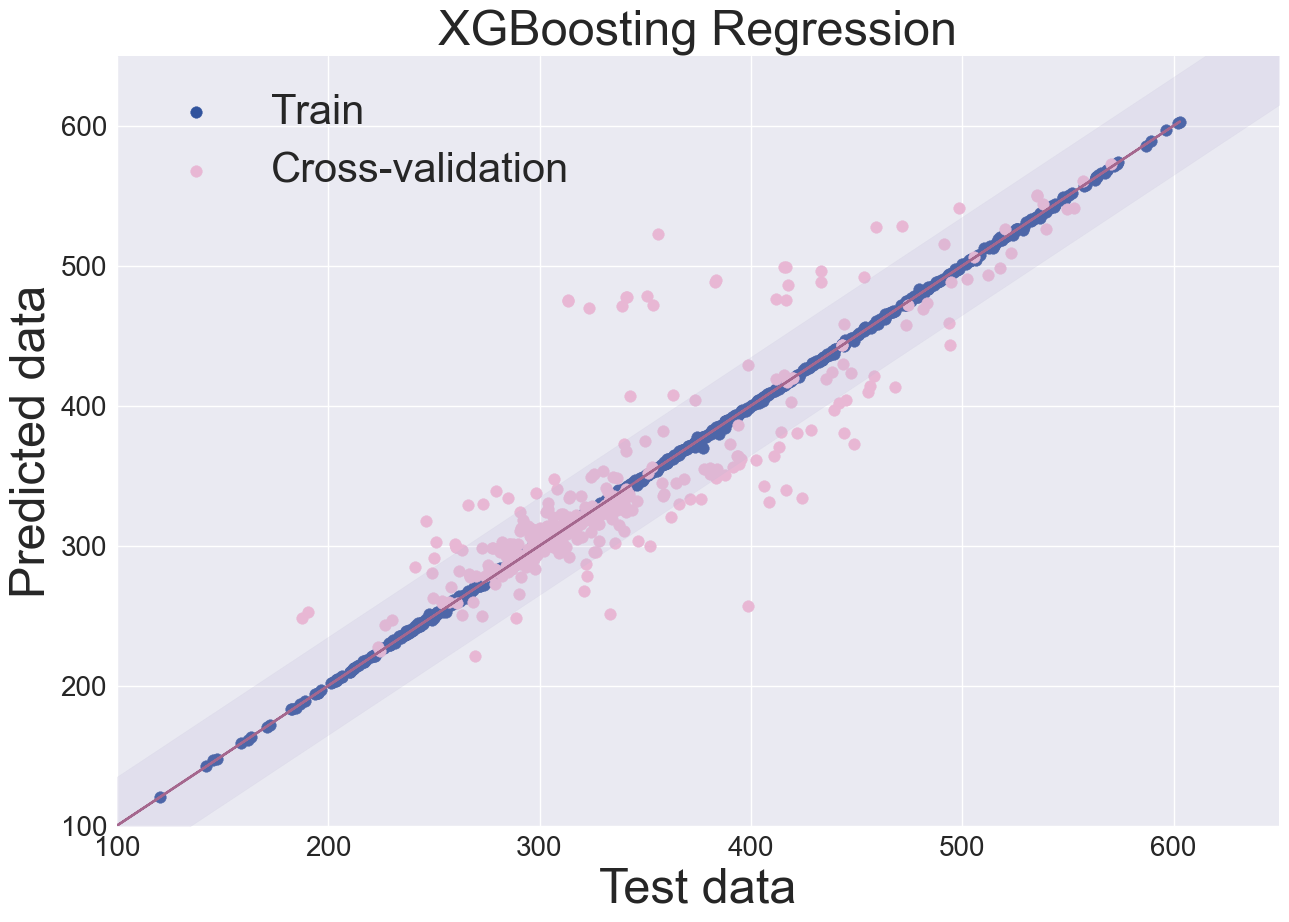

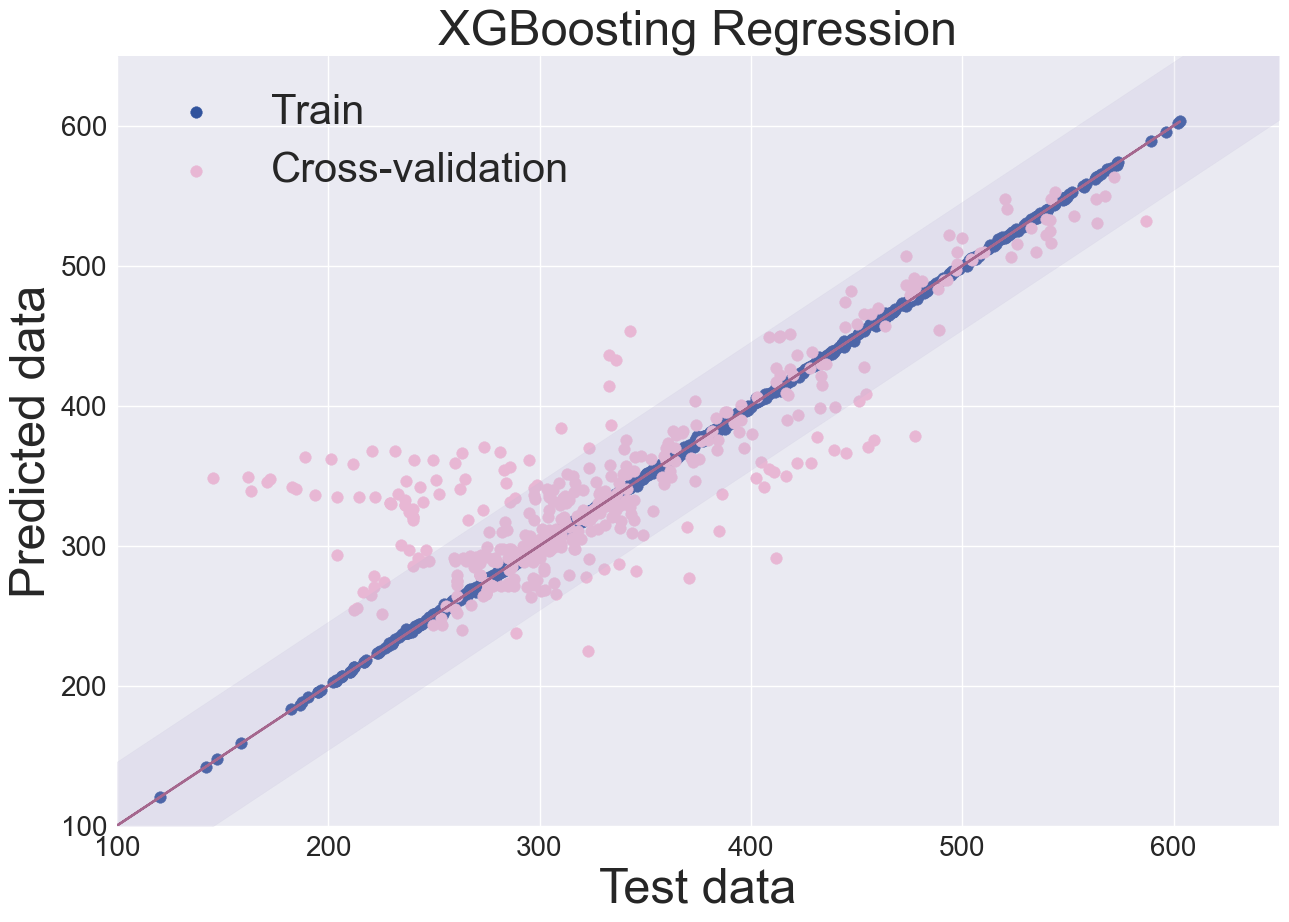

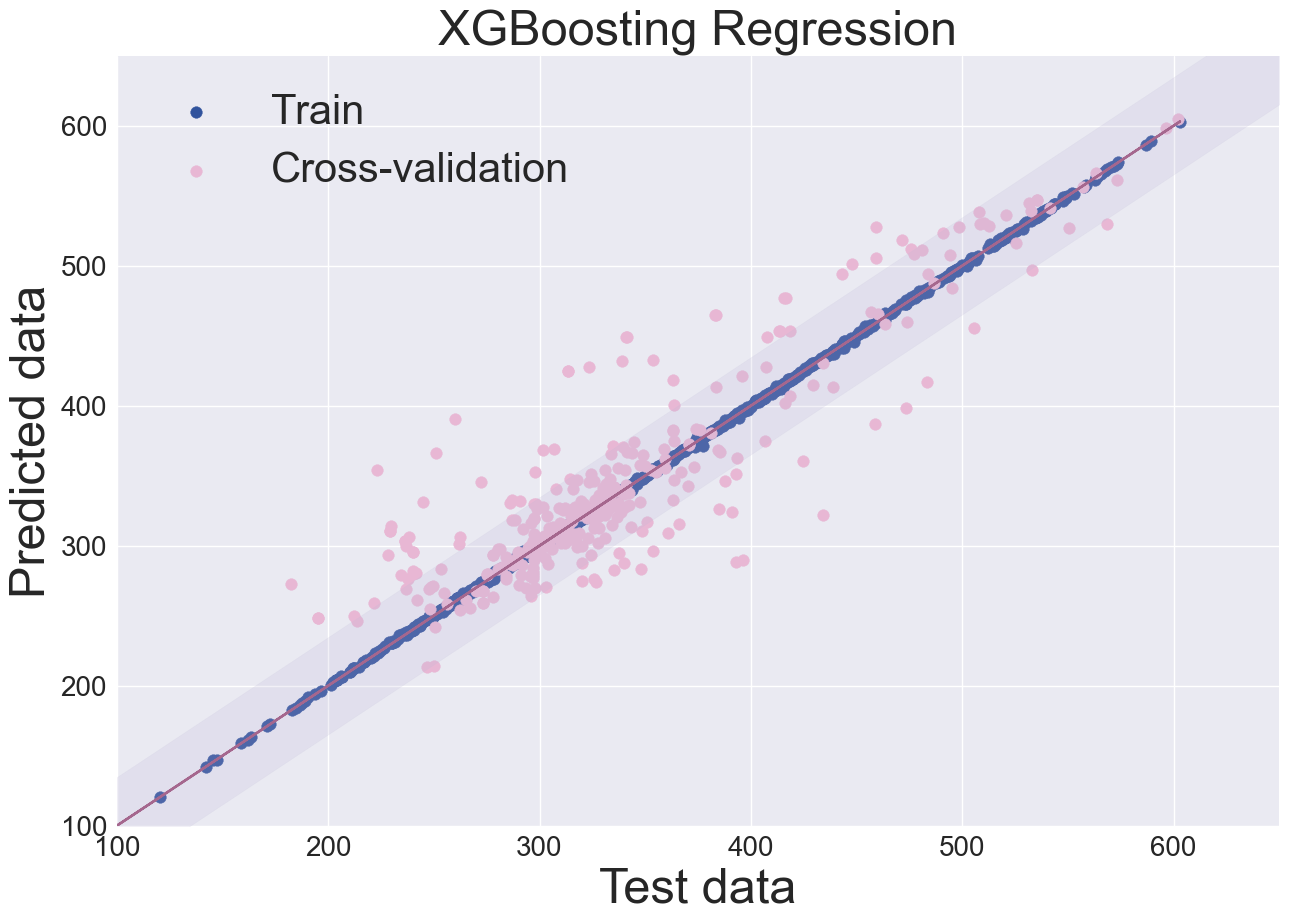

+------------------------------------------------------------------------------------------------------------------------------------------+
|                                                          XGBoosting Regression                                                           |
+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  metrics   |        mean        |         1          |         2          |         3          |         4          |         5          |
+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   R2 CV    | 0.6975455115326801 | 0.6722529337376064 | 0.6393331473858745 | 0.7226670134800488 | 0.6703121441197952 | 0.7831623189400752 |
|  RMSE CV   | 40.52224494089363  | 42.85672576159397  | 44.327065364270226 | 34.96513889165379  | 45.745741879035165 | 34.71655280791497  |
|  R2 Train  

In [ ]:
param_grid = {
    'n_estimators': 170,
    'max_depth': 8,
    'learning_rate': 0.17,
    'subsample': 0.9,
    'colsample_bytree': 0.65
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = XGBRegressor(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('XGBoosting Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.style.use('seaborn')
    plt.show()

table3 = PrettyTable()
table3.title = "XGBoosting Regression" 
table3.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table3.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table3.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table3.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table3.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table3)

xgb_type = compute_type(xy_list, model)

**Conclusion:** Boosters show the best results among all the models used by various metrics

## 5. Other models

### 5.1. Support Vector Machine
The main idea of the method is to translate the original vectors into a higher dimensional space and search for a separating hyperplane with the largest gap in this space. Two parallel hyperplanes are constructed on both sides of the hyperplane separating the classes. The separating hyperplane will be the hyperplane that creates the greatest distance to two parallel hyperplanes. The algorithm is based on the assumption that the greater the difference or distance between these parallel hyperplanes, the smaller the average classifier error will be.

In [ ]:
param_grid = {
    'C': np.arange(0.1, 20, 4),
    'epsilon': np.arange(0.01, 1, 0.15),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': np.arange(0.001, 1, 0.2)
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Количество комбинаций', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = SVR(**param_grid)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

Количество комбинаций 700
The best combination of hyperparameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf', 'gamma': 0.801}


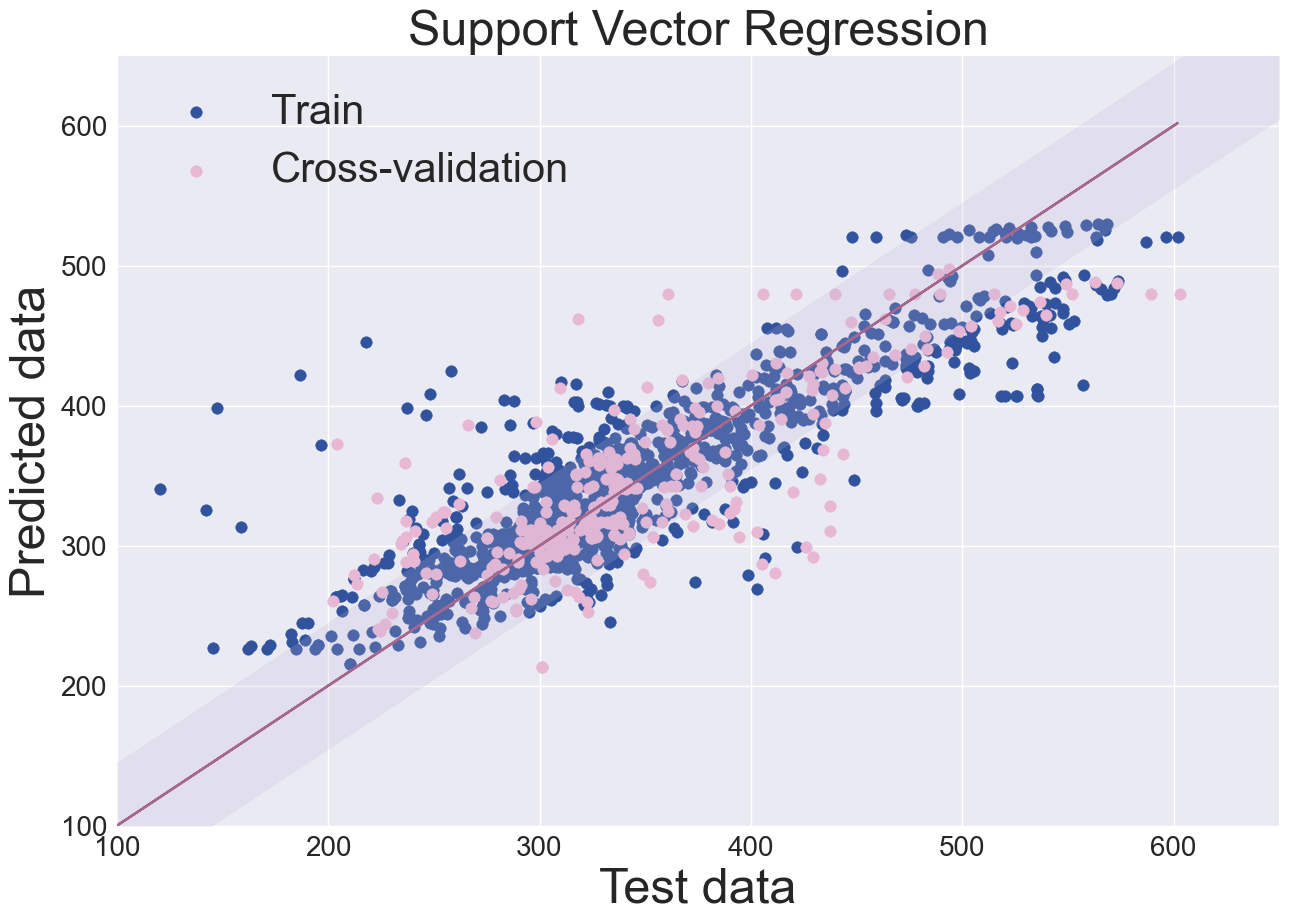

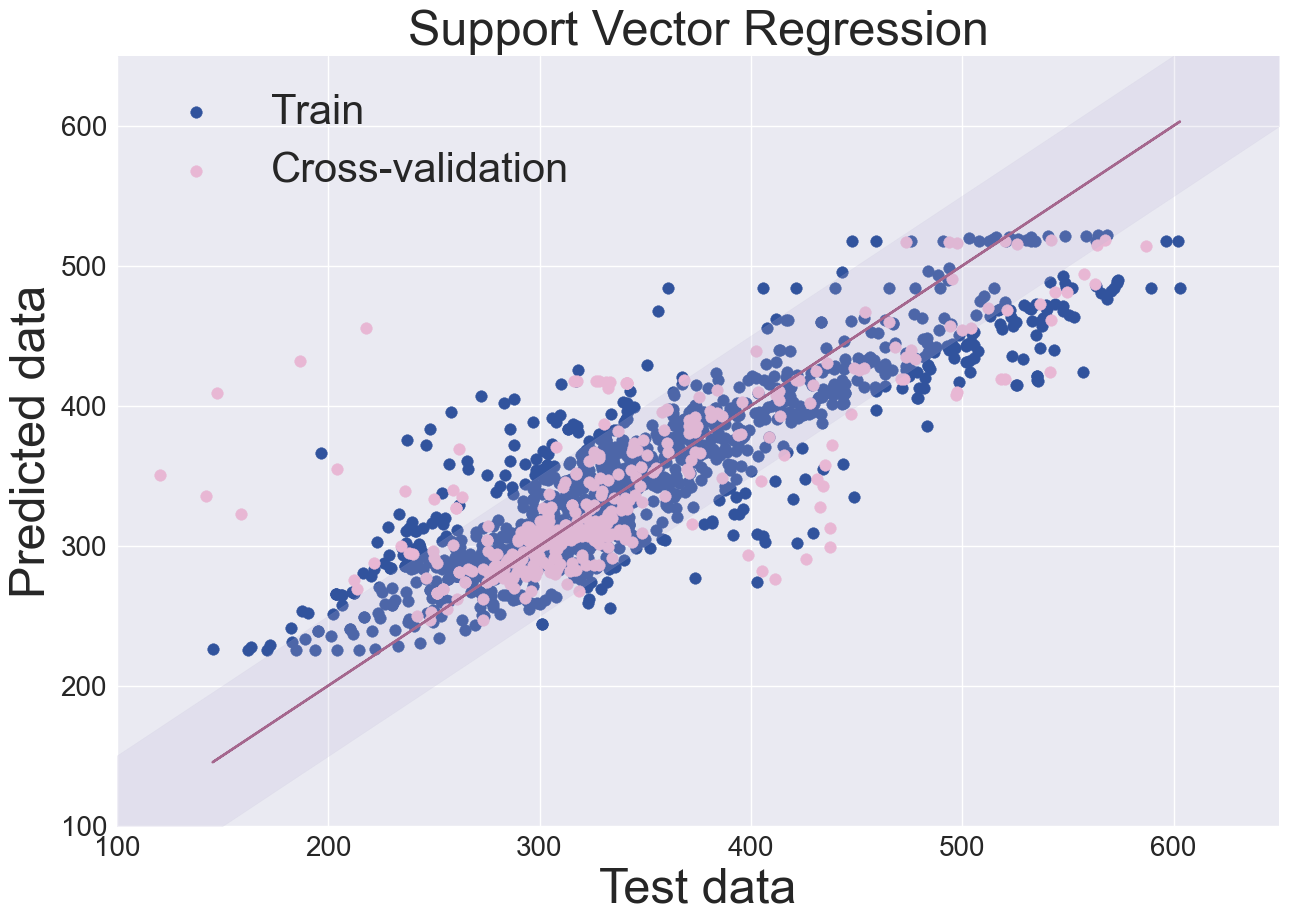

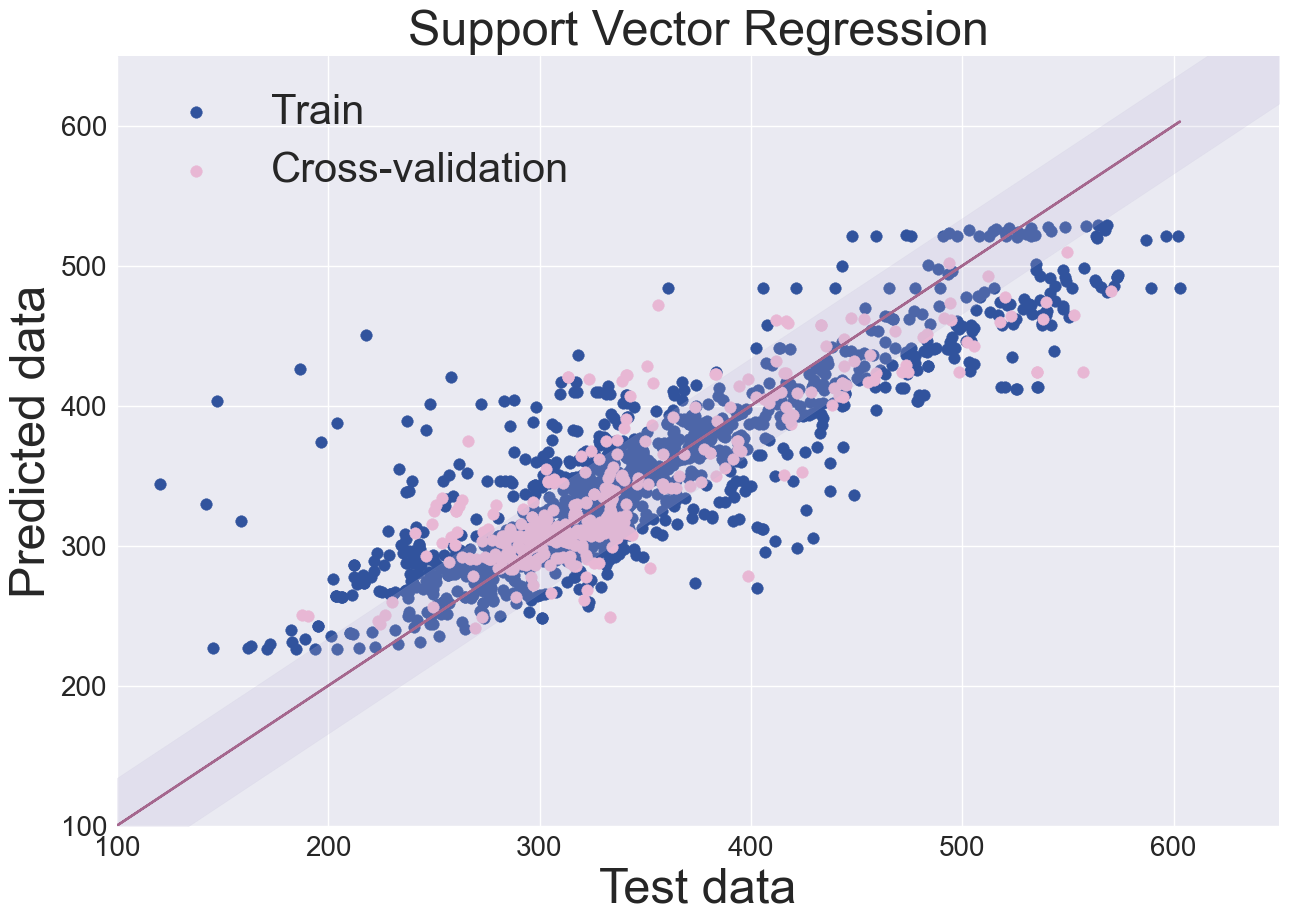

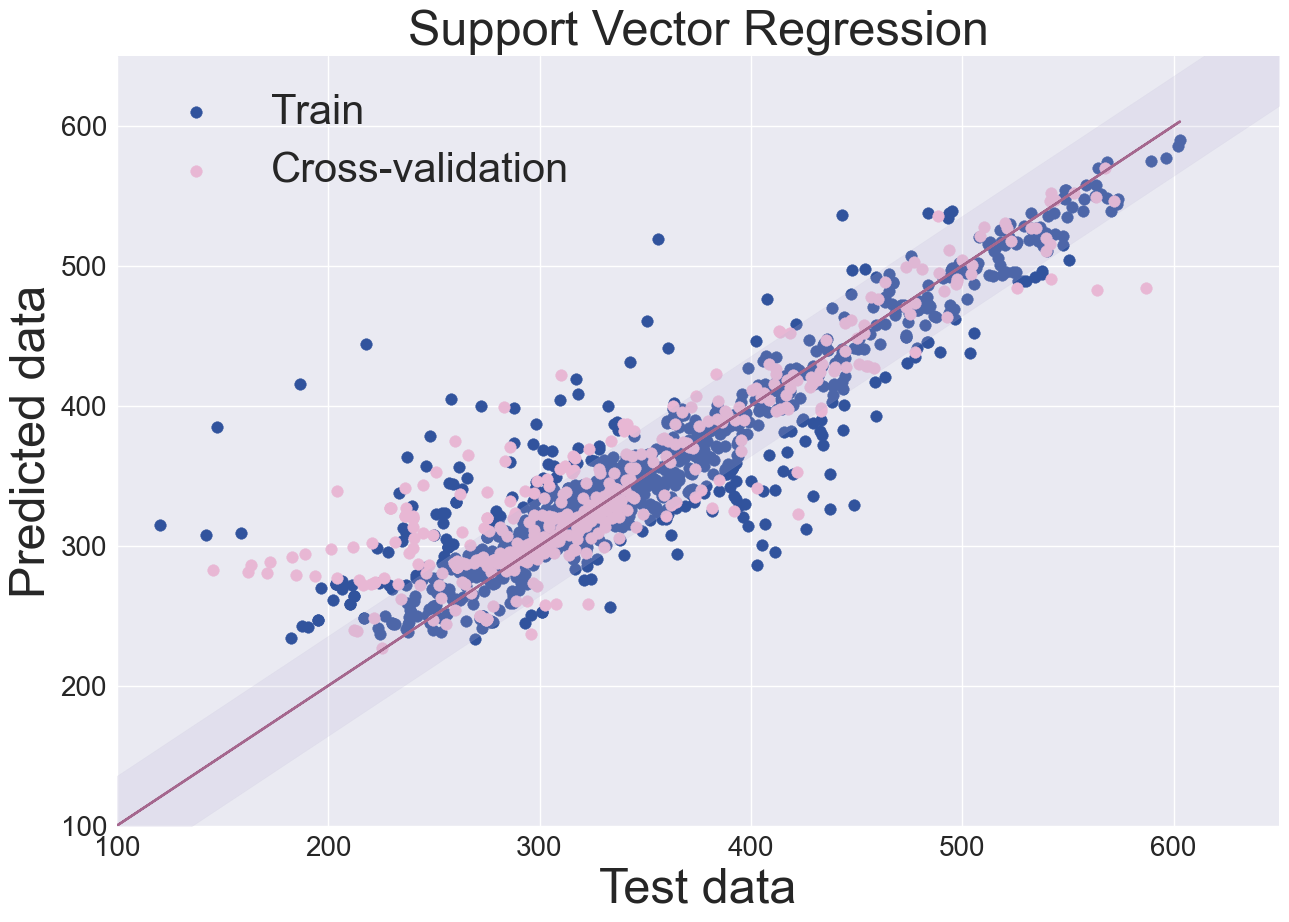

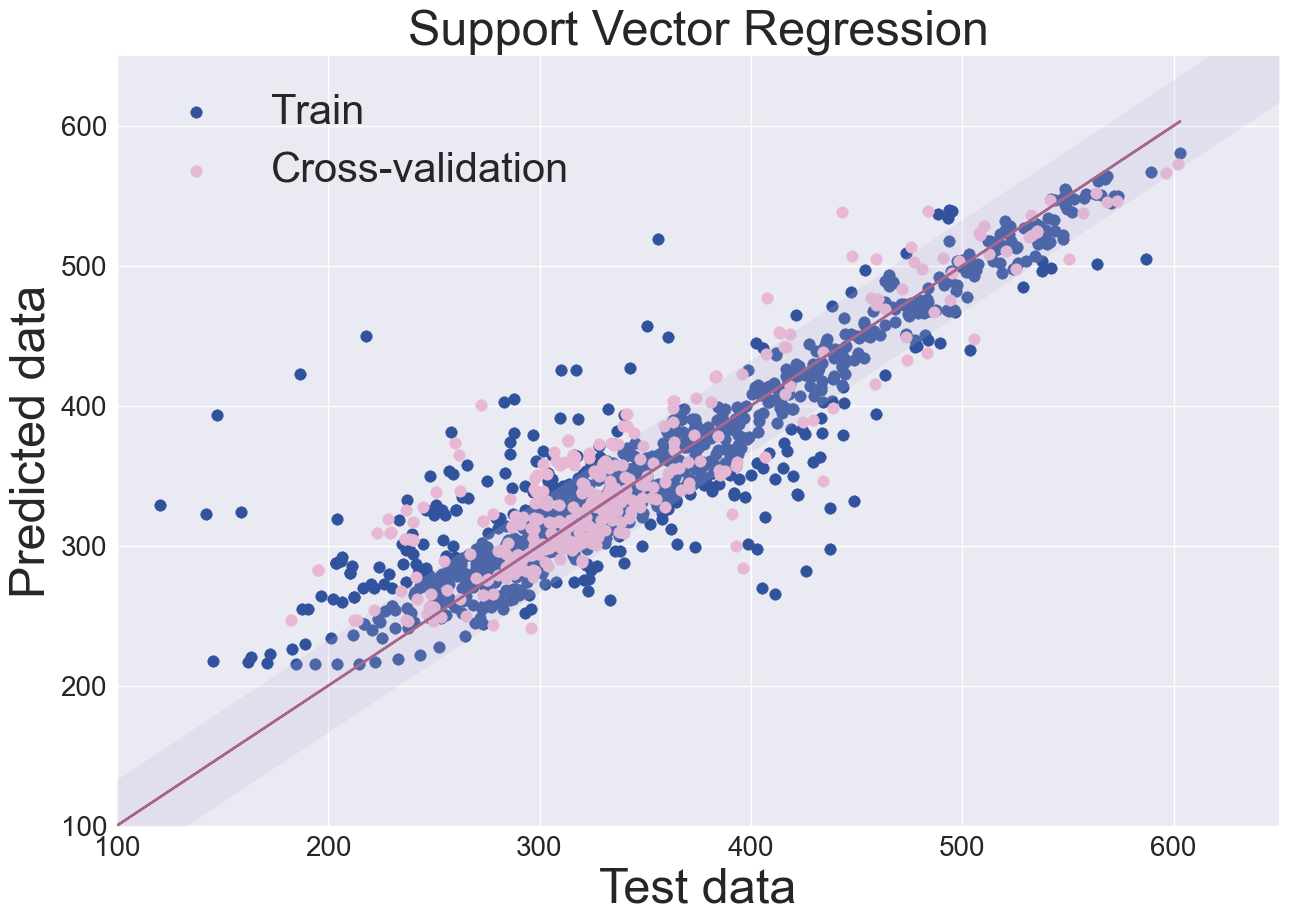

+------------------------------------------------------------------------------------------------------------------------------------------+
|                                                        Support Vector Regression                                                         |
+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  metrics   |        mean        |         1          |         2          |         3          |         4          |         5          |
+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   R2 CV    | 0.7040086280682092 | 0.638771077649886  | 0.5377380242503556 | 0.7362125251891221 | 0.799789377752652  | 0.8075321354990305 |
|  RMSE CV   | 39.526544192187515 | 44.99257396888177  | 50.183384826972535 | 34.10056531435643  | 35.648622899108325 | 32.707573951618514 |
|  R2 Train  

In [ ]:
param_grid = {
    'C': 0.1,
    'epsilon': 0.01,
    'kernel': 'rbf',
    'gamma': 0.801
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = SVR(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('Support Vector Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.style.use('seaborn')
    plt.show()

table5 = PrettyTable()
table5.title = "Support Vector Regression" # в колабе не работает, в vs code работает
table5.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table5.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table5.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table5.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table5.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table5)

svr_type = compute_type(xy_list, model)

### 5.2. K-nearest neighbors
K-nearest neighbors is a nonparametric method that intuitively approximates the relationship between independent variables and a continuous result by averaging observations in the same area.

In [ ]:
param_grid = {
    'n_neighbors': range(2, 50, 1),
    'leaf_size': [5],
    'p': [1],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['cityblock', 'euclidean', 'l1', 'l2', 'manhattan']
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = KNeighborsRegressor(**param_grid)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

Number of combinations 960
The best combination of hyperparameters: {'n_neighbors': 15, 'leaf_size': 5, 'p': 1, 'algorithm': 'auto', 'metric': 'cityblock'}


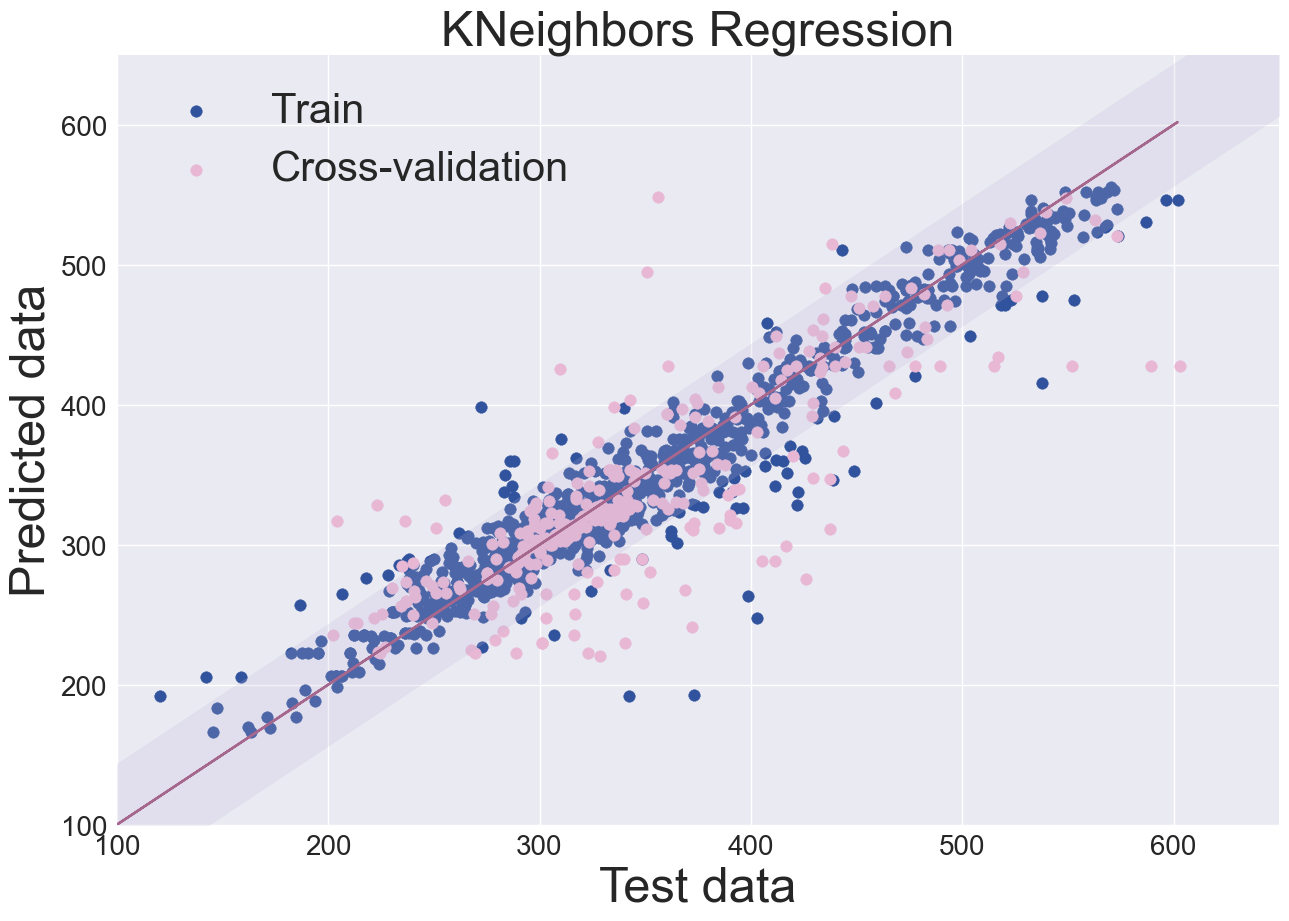

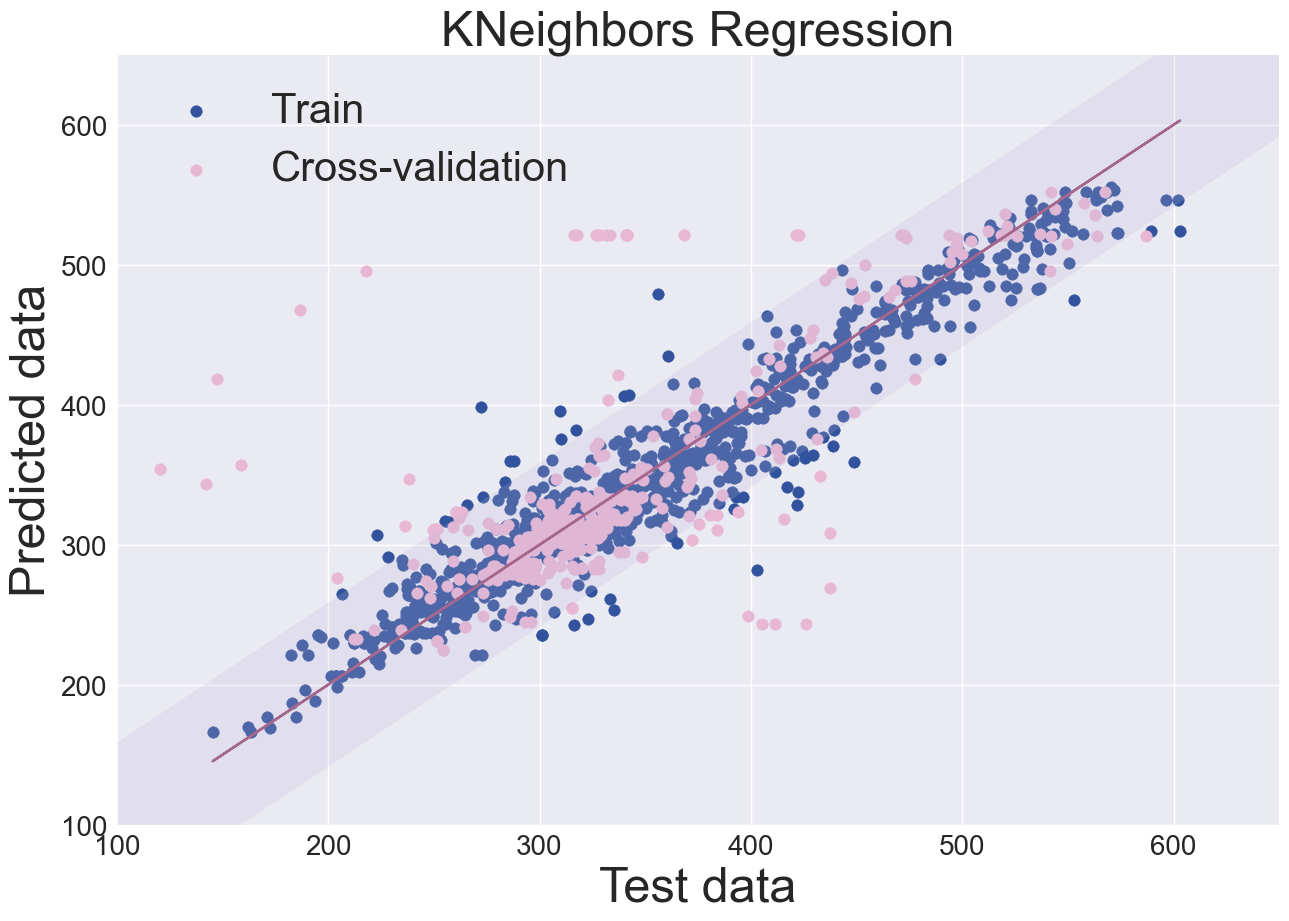

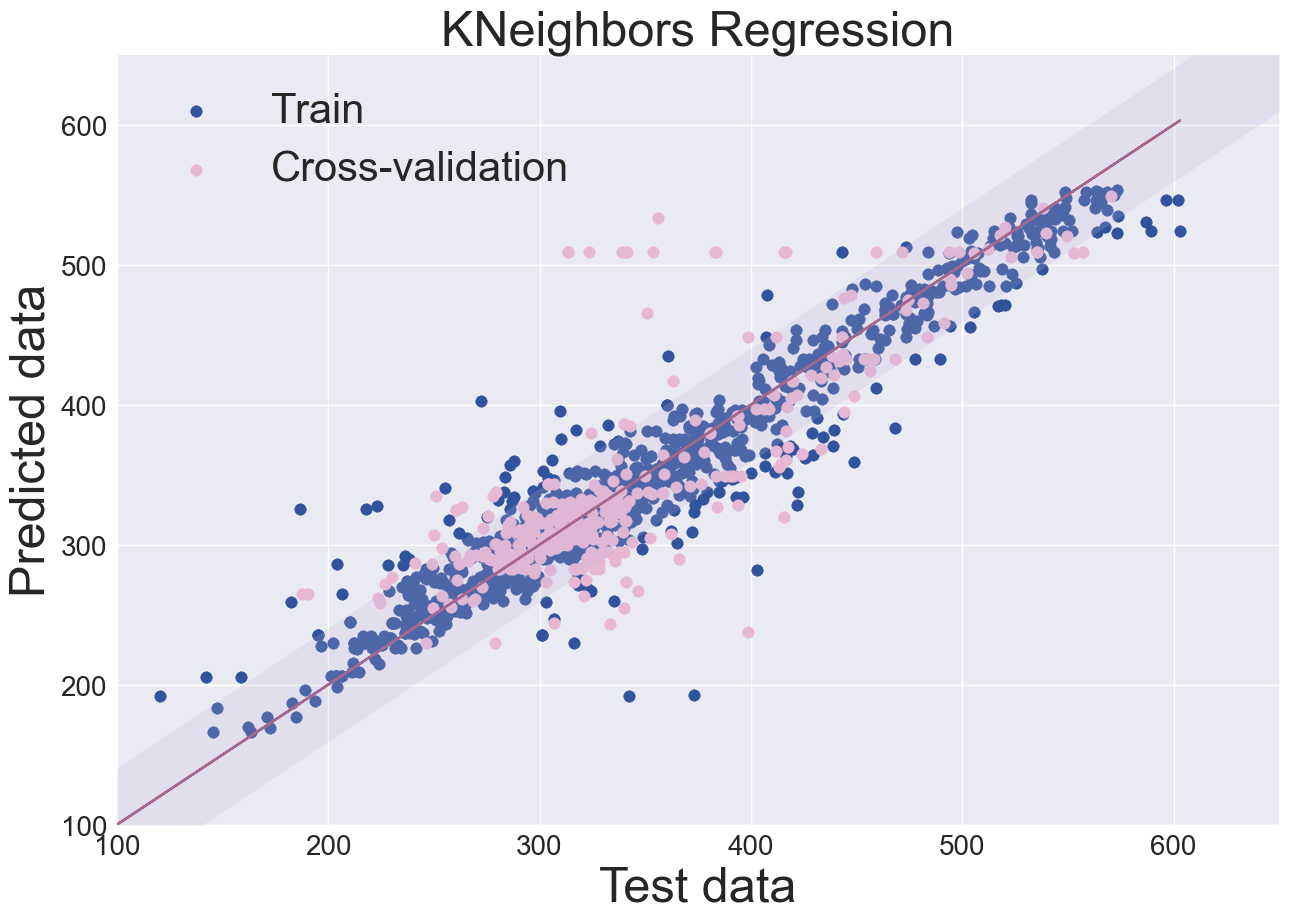

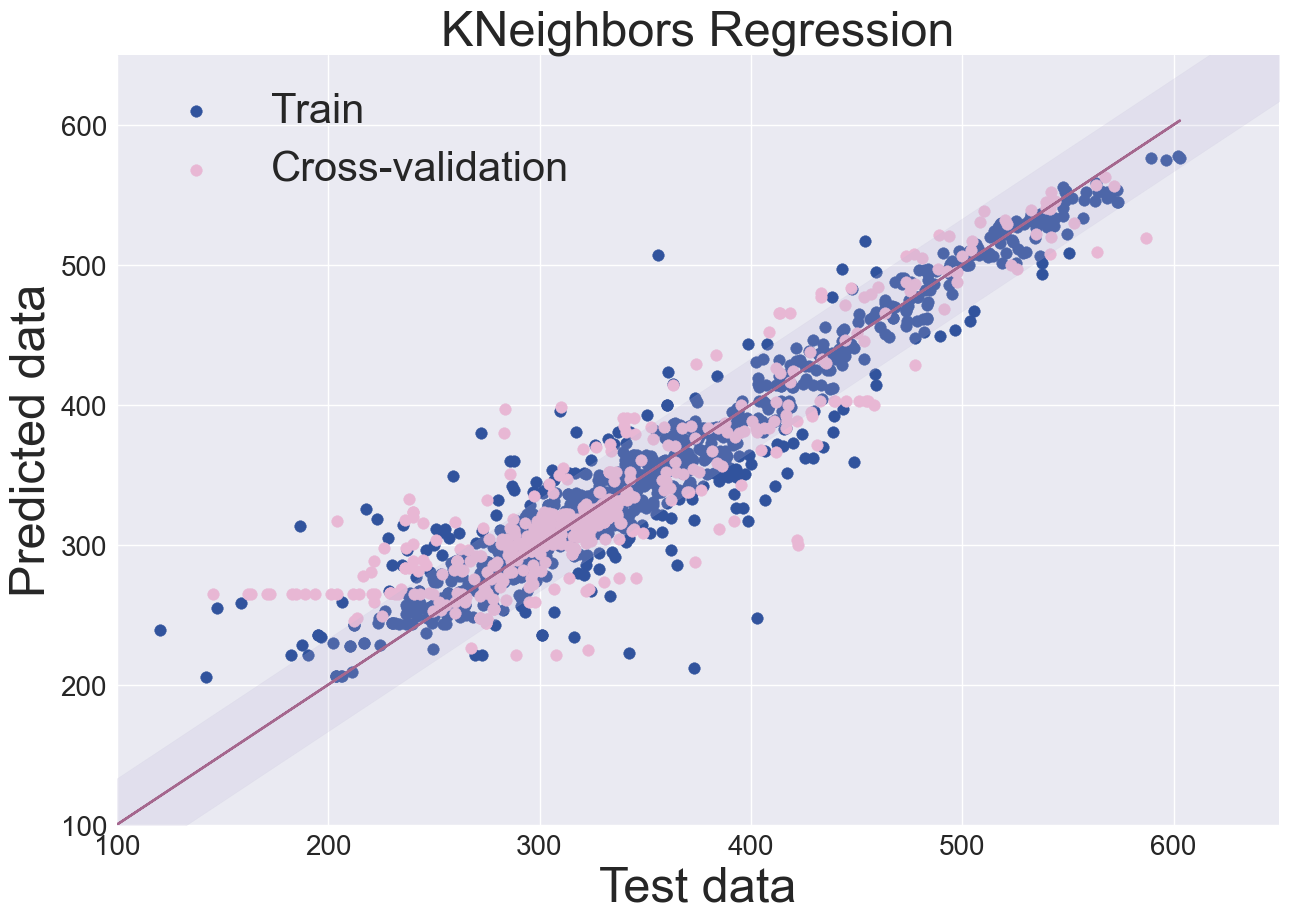

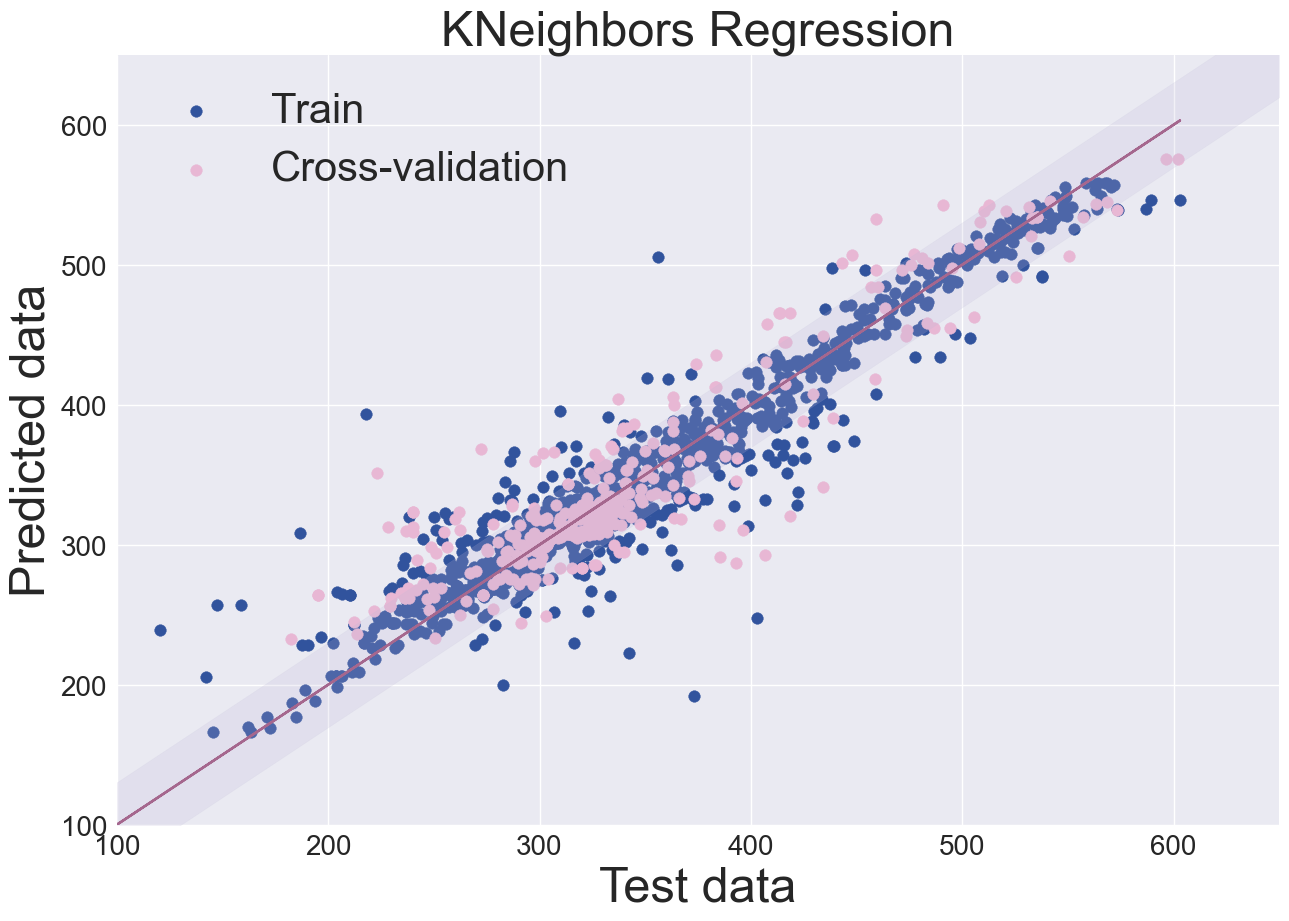

+------------------------------------------------------------------------------------------------------------------------------------------+
|                                                          KNeighbors Regression                                                           |
+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  metrics   |        mean        |         1          |         2          |         3          |         4          |         5          |
+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   R2 CV    | 0.6663696440322086 | 0.661002195425092  | 0.3760973095585436 | 0.6325761933956391 | 0.8273968589644956 | 0.8347756628172721 |
|  RMSE CV   | 41.10730915063265  |  43.5861013510987  | 58.300770497338874 | 40.24557527381378  | 33.09966112283697  | 30.30443750807492  |
|  R2 Train  

In [ ]:
param_grid = {
    'n_neighbors': 6,
    'leaf_size': 5,
    'p': 1,
    'algorithm': 'ball_tree',
    'metric': 'cityblock'
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = KNeighborsRegressor(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('KNeighbors Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.style.use('seaborn')
    plt.show()

table6 = PrettyTable()
table6.title = "KNeighbors Regression" 
table6.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table6.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table6.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table6.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table6.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table6)

knn_type = compute_type(xy_list, model)

### 5.3. Multilayer perceptron (MLP)

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(64, 64, 64), (64, 64, 64, 64)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': np.arange(0.0001, 1, 0.1),
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.00001, 0.01],
    'max_iter': [500]
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = MLPRegressor(**param_grid)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

Number of combinations 480


Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer

The best combination of hyperparameters: {'hidden_layer_sizes': (64, 64, 64, 64), 'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 500}


#### We are optimizing the model

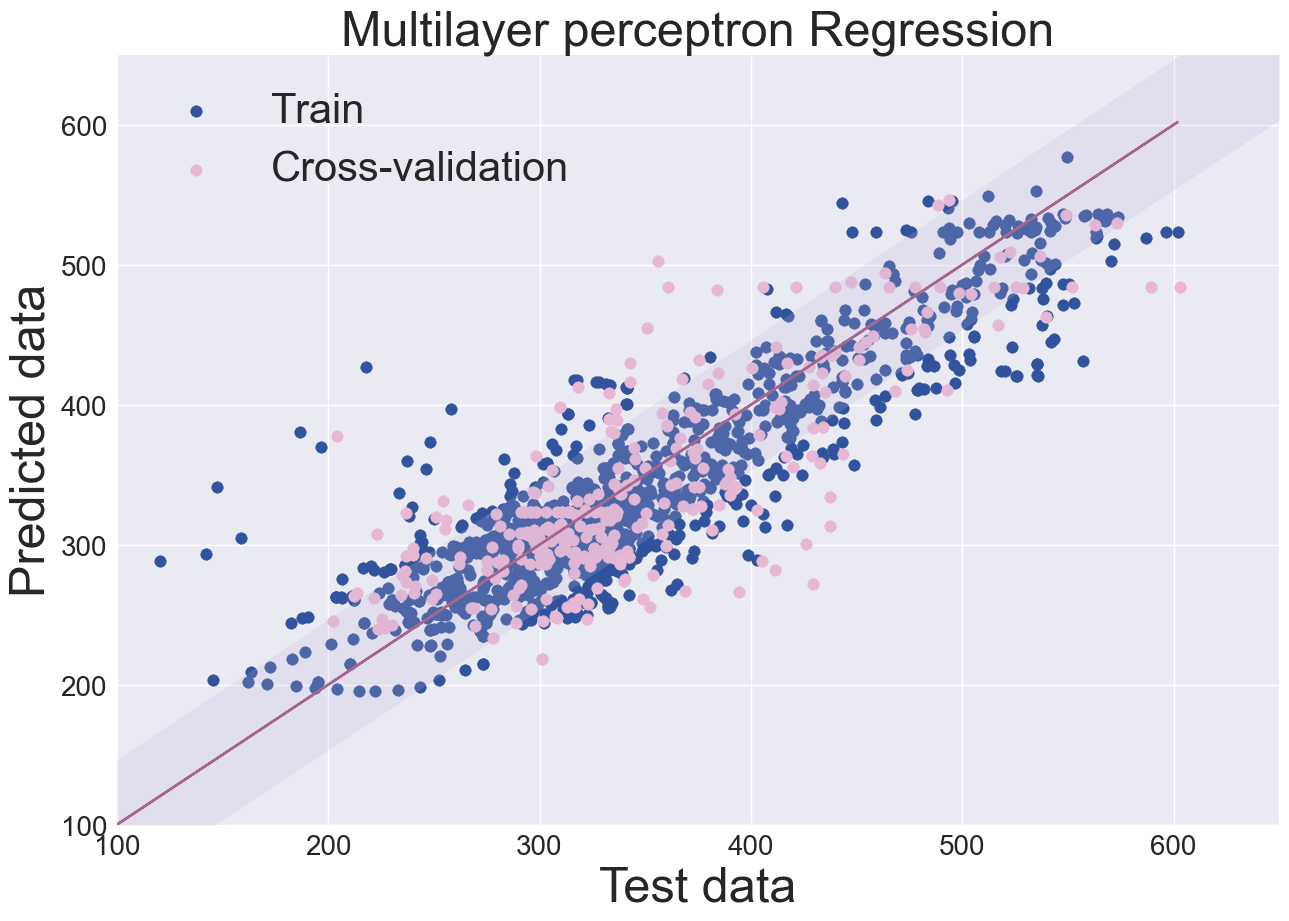

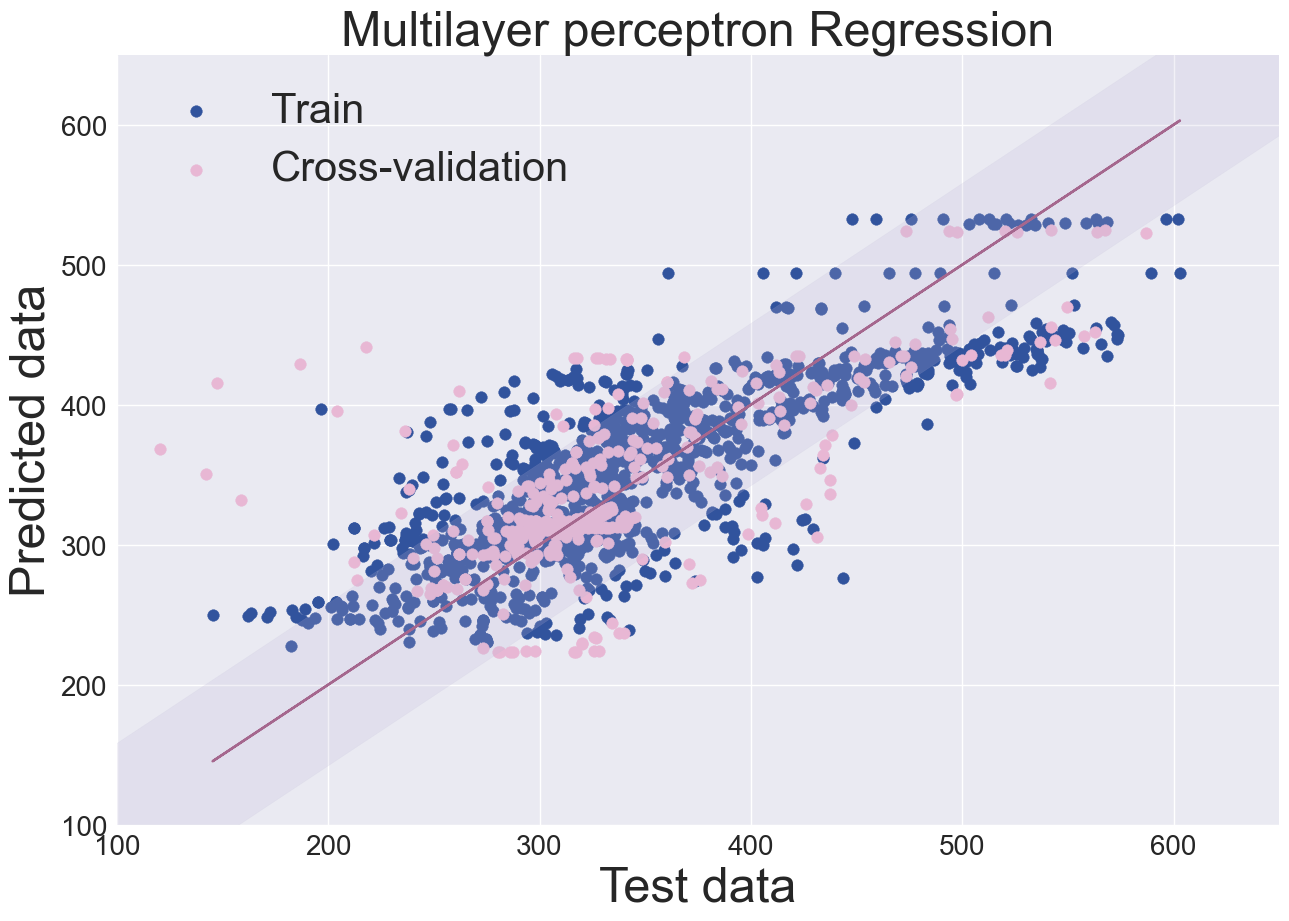

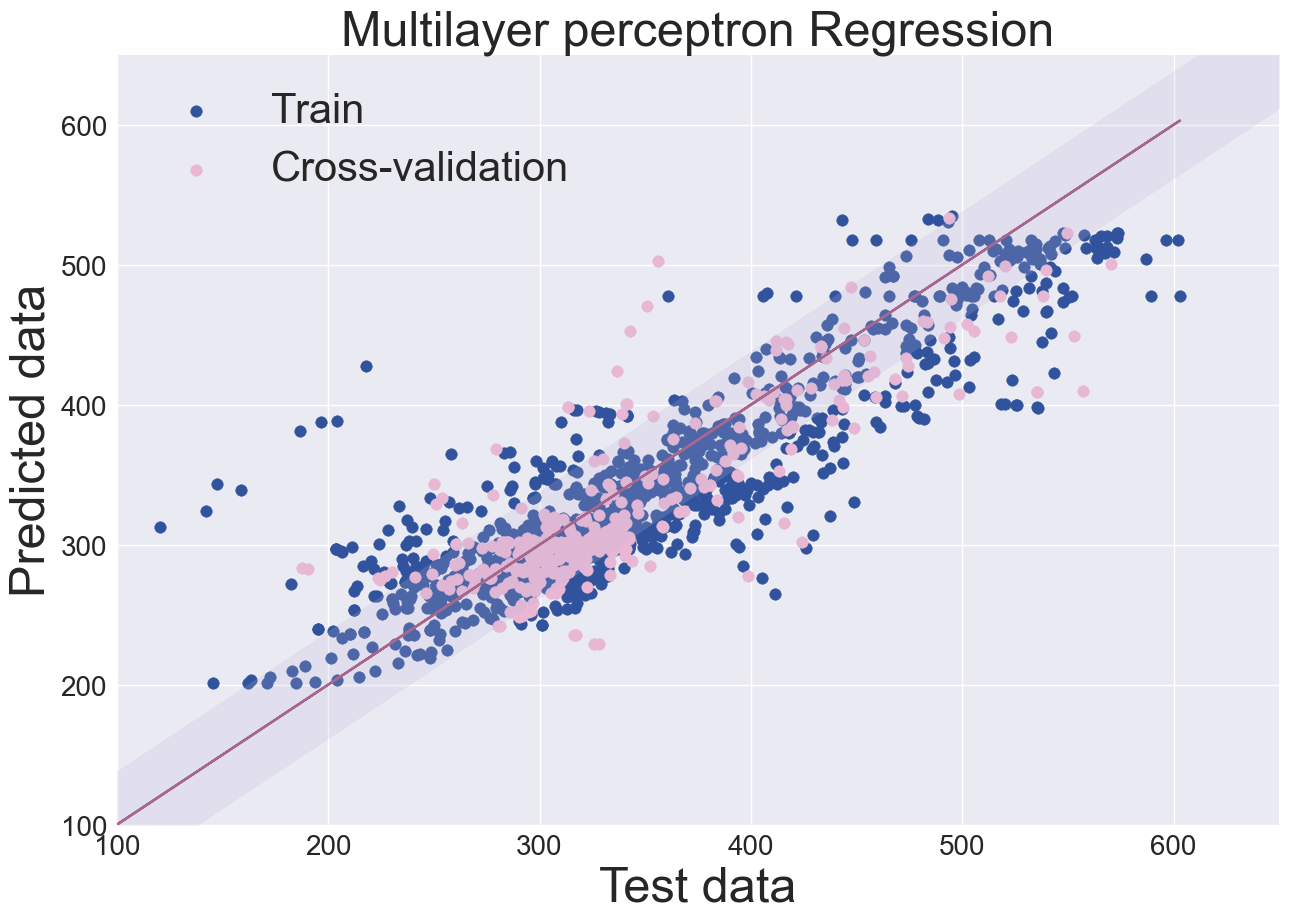

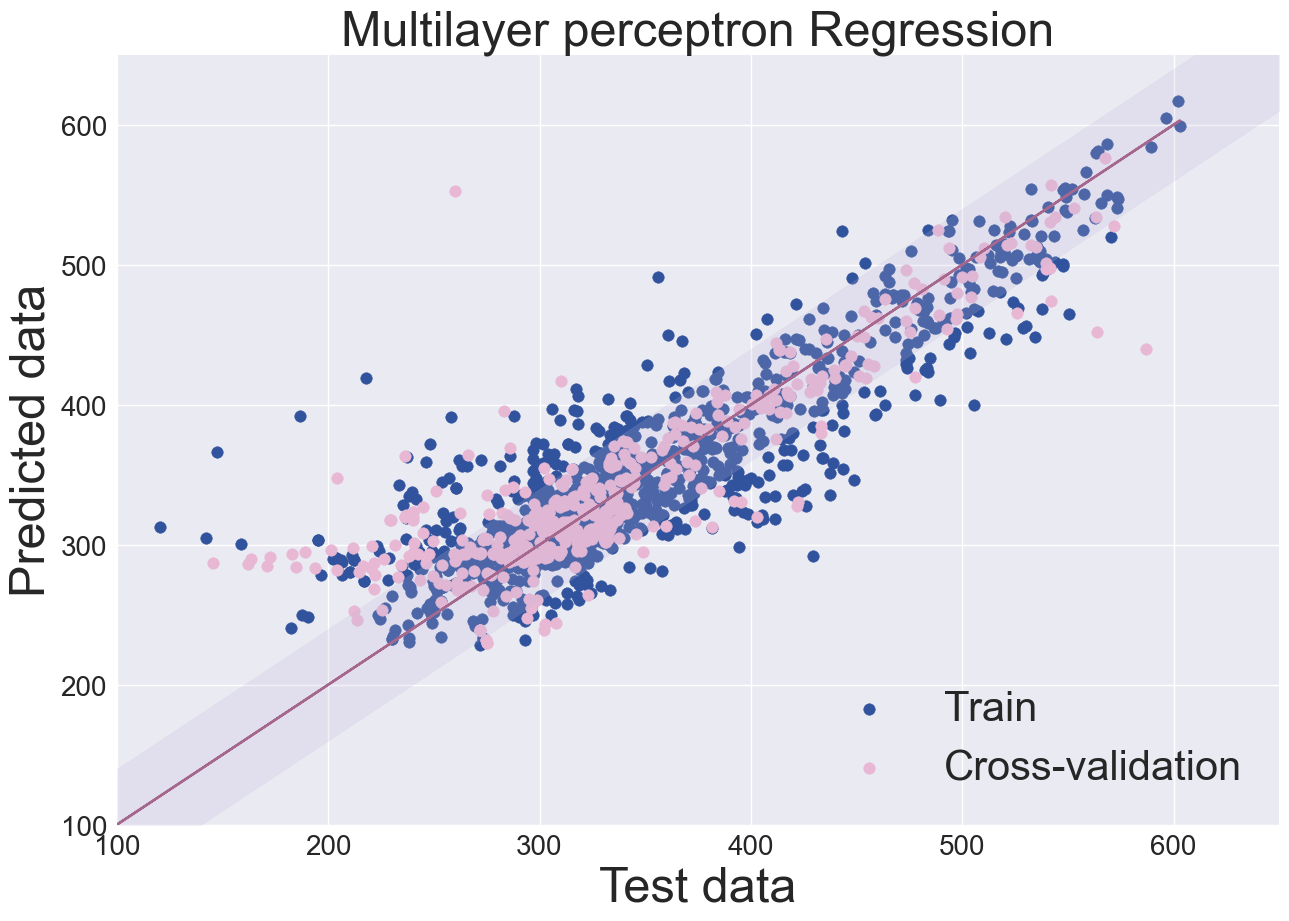

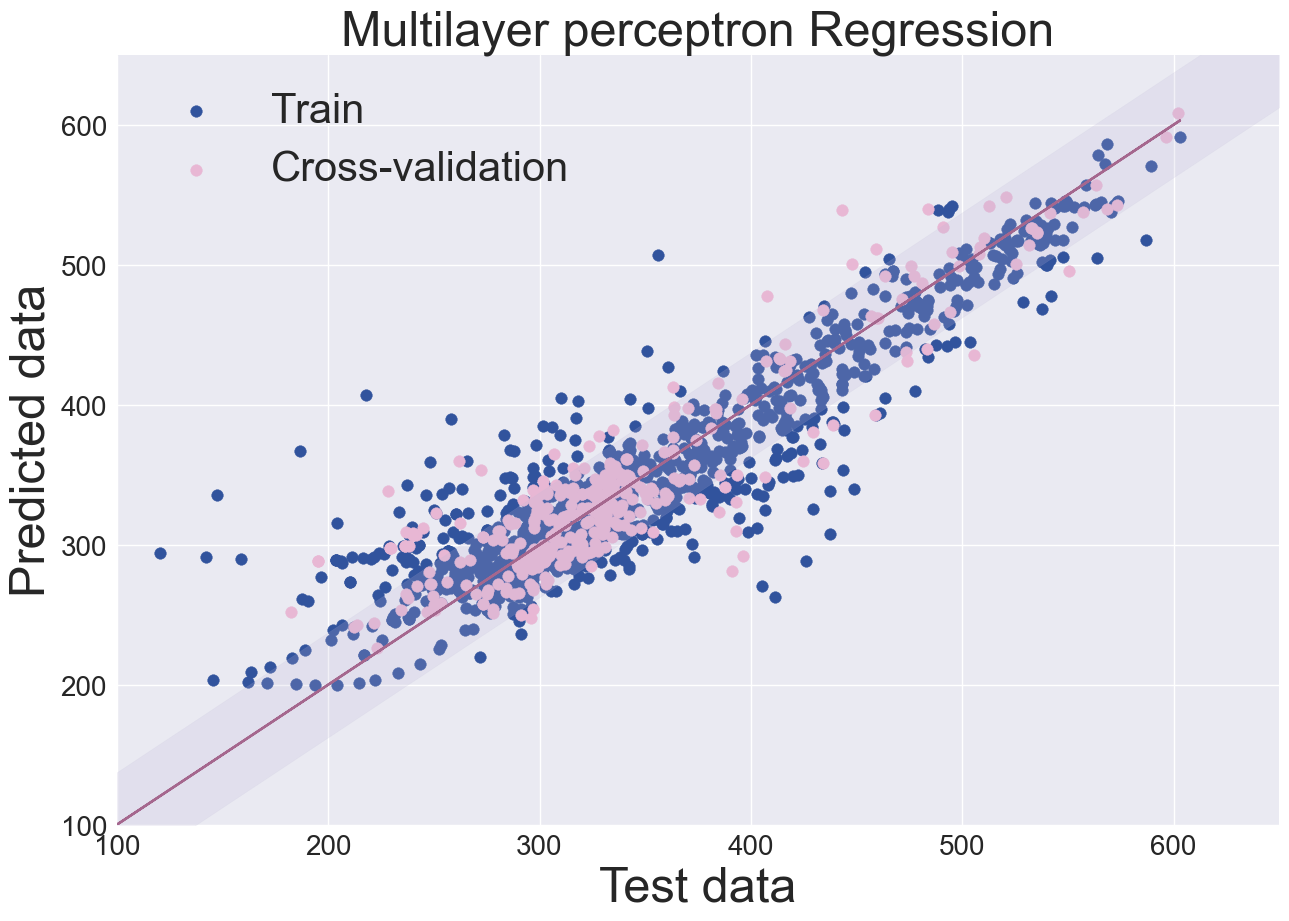

+------------------------------------------------------------------------------------------------------------------------------------------+
|                                                     Multilayer perceptron Regression                                                     |
+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  metrics   |        mean        |         1          |         2          |         3          |         4          |         5          |
+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   R2 CV    | 0.633313460732271  | 0.6185373069793034 | 0.3832090533428901 | 0.6688943516265251 | 0.7487331471114216 | 0.7471934446012148 |
|  RMSE CV   | 43.965908911083346 | 46.235506202627406 | 57.96753866940612  | 38.204787483564814 | 39.93620566429142  | 37.48550653552699  |
|  R2 Train  

In [ ]:
param_grid = {
    'hidden_layer_sizes': (64, 64, 64, 64),
    'activation': 'tanh',
    'alpha': 0.0001,
    'learning_rate': 'invscaling',
    'learning_rate_init': 0.01,
    'max_iter': 500
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = MLPRegressor(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('Multilayer perceptron Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.style.use('seaborn')
    plt.show()

table9 = PrettyTable()
table9.title = "Multilayer perceptron Regression" 
table9.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table9.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table9.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table9.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table9.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table9)

mlp_type = compute_type(xy_list, model)

**Output:** The algorithms given in this chapter have shown good results, but they work worse than boosters

## 6. General graphs
For a visual comparison of all algorithms, graphs were constructed showing the dependence of R2 and RMSE from algorithm to algorithm

### 6.1. Graphs for various ML algorithms

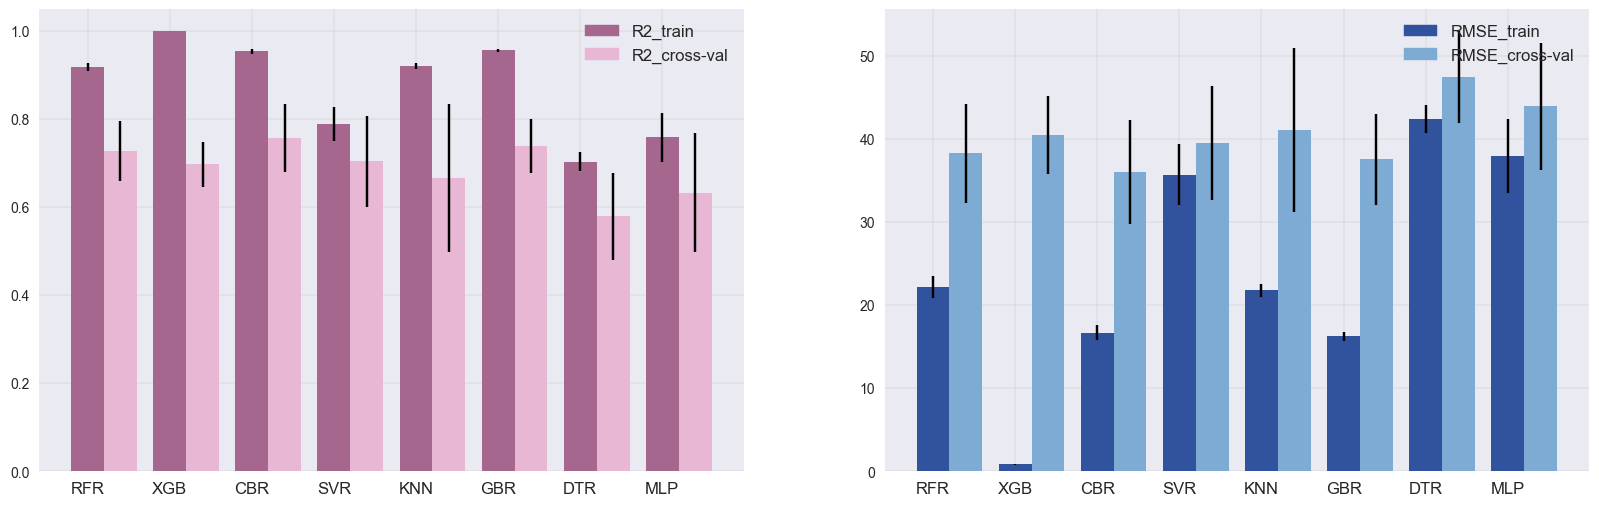

In [ ]:
# Different tables table1, table2, ..., table9
tables = [table2, table3, table4, table5, table6, table7, table8, table9]
names = ['RFR', 'XGB', 'CBR', 'SVR', 'KNN', 'GBR', 'DTR', 'MLP']

mean_r2_train_list = []
mean_r2_test_list = []
std_r2_train_list = []
std_r2_test_list = []

mean_rmse_train_list = []
mean_rmse_test_list = []
std_rmse_train_list = []
std_rmse_test_list = []

# Cycle to extract R2_train and R2_test values from each table
for table in tables:
    mean_r2_train = float(table._rows[2][1])
    mean_r2_test = float(table._rows[0][1])
    std_r2_train = np.std([table._rows[2][i] for i in [2, 3, 4, 5, 6]])
    std_r2_test = np.std([table._rows[0][i] for i in [2, 3, 4, 5, 6]])

    mean_r2_train_list.append(mean_r2_train)
    mean_r2_test_list.append(mean_r2_test)
    std_r2_train_list.append(std_r2_train)
    std_r2_test_list.append(std_r2_test)
    
    mean_rmse_train = float(table._rows[3][1])
    mean_rmse_test = float(table._rows[1][1])
    std_rmse_train = np.std([table._rows[3][i] for i in [2, 3, 4, 5, 6]])
    std_rmse_test = np.std([table._rows[1][i] for i in [2, 3, 4, 5, 6]])

    mean_rmse_train_list.append(mean_rmse_train)
    mean_rmse_test_list.append(mean_rmse_test)
    std_rmse_train_list.append(std_rmse_train)
    std_rmse_test_list.append(std_rmse_test)

# Creating a graph
barWidth = 0.4
r1 = np.arange(len(names))
r2 = [x + barWidth for x in r1]

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharex=False)

ax1.bar(r1, mean_r2_train_list, color=colors[0], width=barWidth, label='R2_train', yerr=std_r2_train_list)
ax1.bar(r2, mean_r2_test_list, color=colors[1], width=barWidth, label='R2_cross-validation', yerr=std_r2_test_list)
ax2.bar(r1, mean_rmse_train_list, color=colors[4], width=barWidth, label='RMSE_train', yerr=std_rmse_train_list)
ax2.bar(r2, mean_rmse_test_list, color=colors[3], width=barWidth, label='RMSE_cross-validation', yerr=std_rmse_test_list)


ax1.grid(color='#C3C6BA', linewidth=0.3)
ax2.grid(color='#C3C6BA', linewidth=0.3)

ax1_train = mpatches.Patch(label='R2_train', color=colors[0])
ax1_test = mpatches.Patch(label='R2_cross-val', color=colors[1])
ax2_train = mpatches.Patch(label='RMSE_train', color=colors[4])
ax2_test = mpatches.Patch(label='RMSE_cross-val', color=colors[3])



ax1.legend(handles=[ax1_train, ax1_test], fontsize=12)
ax2.legend(handles=[ax2_train, ax2_test],  fontsize=12)

ax1.set_xticks(np.arange(8))
ax2.set_xticks(np.arange(8))
ax1.set_xticklabels(['RFR', 'XGB', 'CBR', 'SVR', 'KNN', 'GBR', 'DTR', 'MLP'], fontsize=12)
ax2.set_xticklabels(['RFR', 'XGB', 'CBR', 'SVR', 'KNN', 'GBR', 'DTR', 'MLP'], fontsize=12)

plt.show()


### 6.2. Graphs for various types of DES
Also, to understand how well the models predict values for different types of DES, we will build graphs that will help you see this

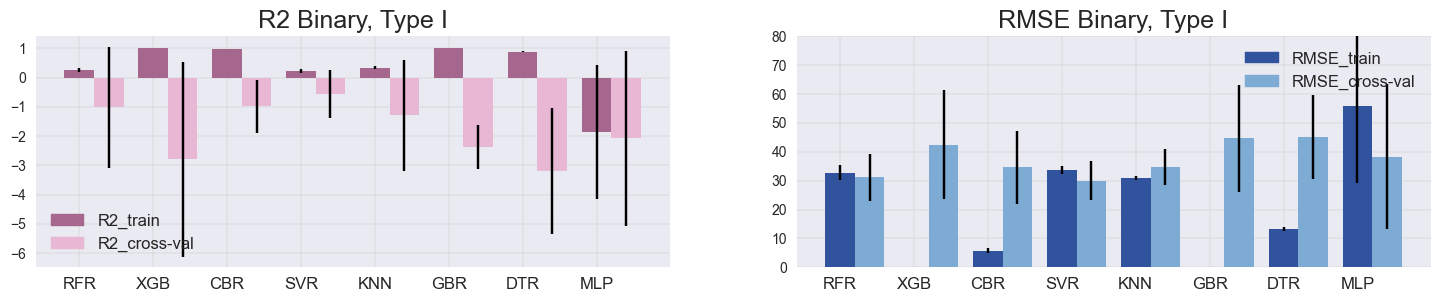

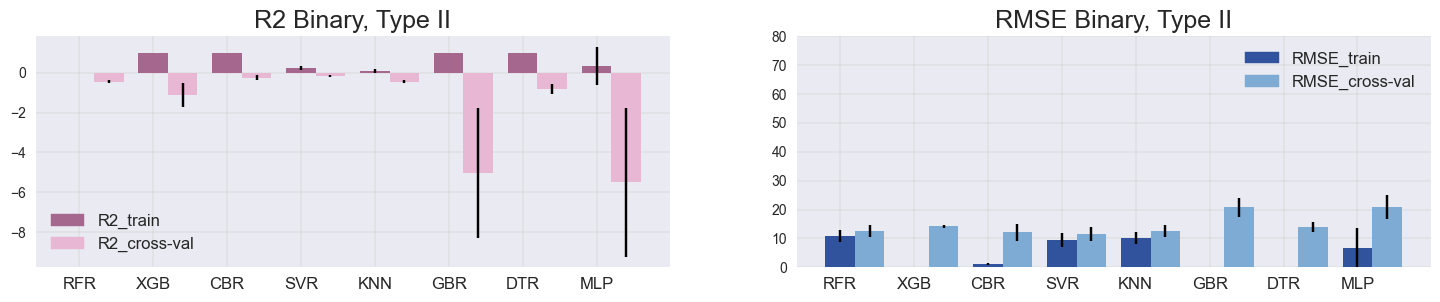

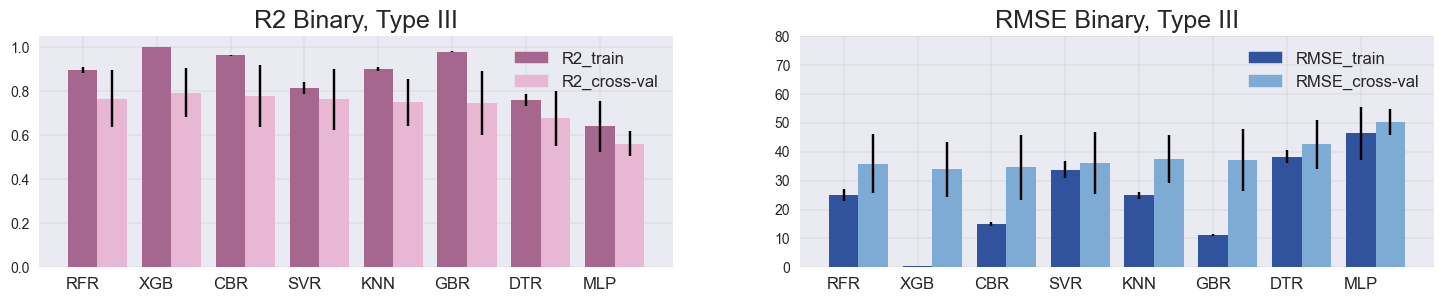

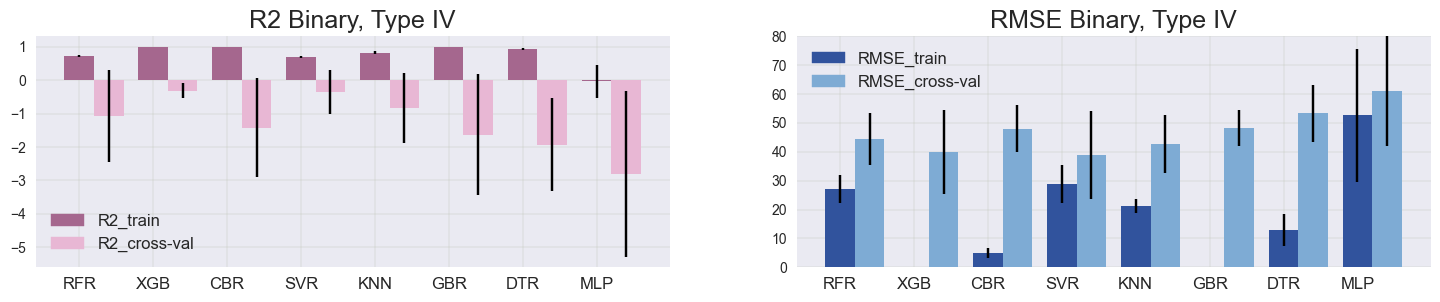

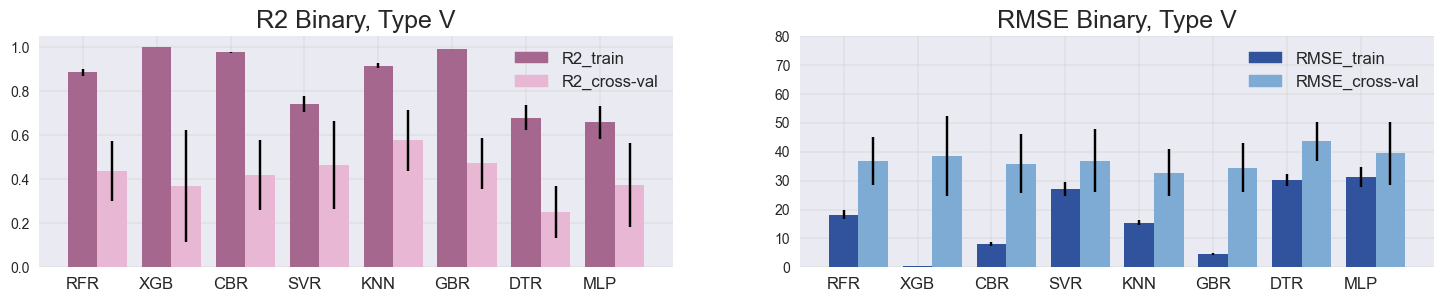

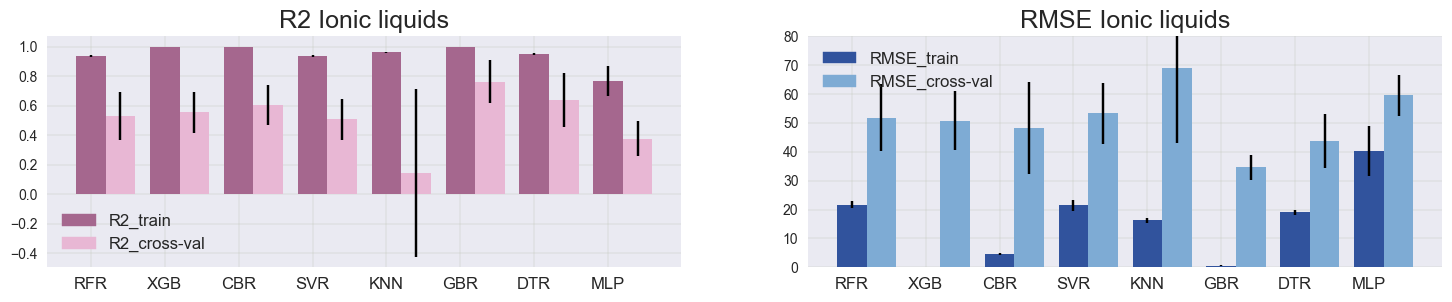

In [ ]:
keys = ['1', '2', '3', '4', '5', 'IL']
metrics_type = [rfr_type, xgb_type, cbr_type, svr_type, knn_type, gbr_type, dtr_type, mlp_type]
count = 0
for key in keys:
    mean_r2_train_list = []
    mean_r2_test_list = []
    std_r2_train_list = []
    std_r2_test_list = []  
    
    mean_rmse_train_list = []
    mean_rmse_test_list = []
    std_rmse_train_list = []
    std_rmse_test_list = []
    
    for metric in metrics_type:
        mean_r2_train_list.append(metric[key][2][1])
        mean_r2_test_list.append(metric[key][0][1])
        std_r2_train_list.append(np.std(metric[key][2][2:6]))
        std_r2_test_list.append(np.std(metric[key][0][2:6]))
       
        mean_rmse_train_list.append(metric[key][3][1])
        mean_rmse_test_list.append(metric[key][1][1])
        std_rmse_train_list.append(np.std(metric[key][3][2:6]))
        std_rmse_test_list.append(np.std(metric[key][1][2:6]))
    
    names = ['RFR', 'XGB', 'CBR', 'SVR', 'KNN', 'GBR', 'DTR', 'MLP']

    # Creating a graph
    barWidth = 0.4
    r1 = np.arange(len(names))
    r2 = [x + barWidth for x in r1]

    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(18, 3), sharex=False)

    ax1.bar(r1, mean_r2_train_list, color=colors[0], width=barWidth, label='R2_train', yerr=std_r2_train_list)
    ax1.bar(r2, mean_r2_test_list, color=colors[1], width=barWidth, label='R2_cross-val', yerr=std_r2_test_list)
    ax2.bar(r1, mean_rmse_train_list, color=colors[4], width=barWidth, label='RMSE_train', yerr=std_rmse_train_list)
    ax2.bar(r2, mean_rmse_test_list, color=colors[3], width=barWidth, label='RMSE_cross-val', yerr=std_rmse_test_list)


    ax1.grid(color='#C3C6BA', linewidth=0.3)
    ax2.grid(color='#C3C6BA', linewidth=0.3)

    ax1_train = mpatches.Patch(label='R2_train', color=colors[0])
    ax1_test = mpatches.Patch(label='R2_cross-val', color=colors[1])
    ax2_train = mpatches.Patch(label='RMSE_train', color=colors[4])
    ax2_test = mpatches.Patch(label='RMSE_cross-val', color=colors[3])


    ax1.legend(handles=[ax1_train, ax1_test], fontsize=12)
    ax2.legend(handles=[ax2_train, ax2_test], fontsize=12)

    ax1.set_xticks(np.arange(8))
    ax2.set_xticks(np.arange(8))
    ax1.set_xticklabels(['RFR', 'XGB', 'CBR', 'SVR', 'KNN', 'GBR', 'DTR', 'MLP'], fontsize=12)
    ax2.set_xticklabels(['RFR', 'XGB', 'CBR', 'SVR', 'KNN', 'GBR', 'DTR', 'MLP'], fontsize=12)

    Names = ['Binary, Type I','Binary, Type II', 'Binary, Type III', 'Binary, Type IV', 'Binary, Type V', 'Ionic liquids']
    ax1.set_title(('R2' + ' ' + Names[count]), fontsize = 18)
    ax2.set_title(('RMSE' + ' ' + Names[count]), fontsize = 18)
    ax2.set_ylim(0, 80)
    count += 1

    plt.show()


## General conclusions:
The highest results were shown by Cut Boost, Boost, Multilawyer perceptron on the validation sample, model data accuracy up to R2 = 0.88, and RMSE equal to 0.06. Cat Boost was chosen as the main model, as it shows good results on all types of DES